In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import os

# Set style for plots
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Create output directory for plots
os.makedirs('plots', exist_ok=True)

# Load the dataset
df = pd.read_csv('vgchartz_cleaned.csv')

# Basic info and statistical summary
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert release_year to numeric if needed
if df['release_year'].dtype == 'object':
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Identify variable types
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)

# Function to identify data type
def identify_variable_type(col):
    if df[col].dtype == 'object':
        unique_values = df[col].nunique()
        if unique_values == 2:
            return "Binary"
        elif unique_values <= 10:
            return "Nominal" if not all(df[col].dropna().astype(str).str.isnumeric()) else "Ordinal"
        else:
            return "Nominal"
    else:  # numeric
        unique_values = df[col].nunique()
        if unique_values == 2:
            return "Binary"
        elif unique_values <= 10:
            return "Ordinal"
        else:
            return "Numeric (Continuous)"

# Identify variable types
print("\nVariable Types:")
for col in df.columns:
    print(f"{col}: {identify_variable_type(col)}")

# Calculate statistics for numeric variables
def calculate_statistics(df, column):
    if column in df.columns:
        data = df[column].dropna()
        
        if pd.api.types.is_numeric_dtype(data):
            # Calculate statistics
            mean = data.mean()
            median = data.median()
            mode = data.mode()[0]
            midrange = (data.max() + data.min()) / 2
            q1 = data.quantile(0.25)
            q3 = data.quantile(0.75)
            min_val = data.min()
            max_val = data.max()
            
            print(f"\nStatistics for {column}:")
            print(f"Mean: {mean}")
            print(f"Median: {median}")
            print(f"Mode: {mode}")
            print(f"Midrange: {midrange}")
            print(f"Five Number Summary:")
            print(f"  Minimum: {min_val}")
            print(f"  Q1: {q1}")
            print(f"  Median: {median}")
            print(f"  Q3: {q3}")
            print(f"  Maximum: {max_val}")
            
            return {
                'mean': mean,
                'median': median,
                'mode': mode,
                'midrange': midrange,
                'min': min_val,
                'q1': q1,
                'q3': q3,
                'max': max_val
            }
        else:
            print(f"\n{column} is not numeric, skipping statistics.")
            return None
    else:
        print(f"\n{column} not found in dataset.")
        return None

# Create the 10 required plots with gaming dataset adaptations
def create_plots(df):
    # 1. Histogram for total_sales
    plt.figure(figsize=(10, 6))
    sns.histplot(df['total_sales'], kde=True)
    plt.title('Histogram of Total Game Sales')
    plt.xlabel('Total Sales (millions)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('plots/1_histogram_total_sales.png')
    plt.close()
    print("1. Created histogram for total sales")
    
    # 2. Box Plot for sales across regions
    sales_cols = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[sales_cols])
    plt.title('Box Plot of Sales by Region')
    plt.ylabel('Sales (millions)')
    plt.tight_layout()
    plt.savefig('plots/2_boxplot_regional_sales.png')
    plt.close()
    print("2. Created box plot for regional sales")
    
    # 3. QQ Plot for critic scores
    plt.figure(figsize=(8, 8))
    stats.probplot(df['critic_score'].dropna(), dist="norm", plot=plt)
    plt.title('Q-Q Plot of Critic Scores')
    plt.tight_layout()
    plt.savefig('plots/3_qqplot_critic_score.png')
    plt.close()
    print("3. Created QQ Plot for critic scores")
    
    # 4. Correlation Heatmap for numeric columns
    numeric_game_cols = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'release_year']
    plt.figure(figsize=(12, 10))
    corr = df[numeric_game_cols].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap of Sales and Scores')
    plt.tight_layout()
    plt.savefig('plots/4_correlation_heatmap.png')
    plt.close()
    print("4. Created correlation heatmap")
    
    # 5. Scatter Plot between critic_score and total_sales
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='critic_score', y='total_sales', data=df)
    plt.title('Scatter Plot: Critic Score vs Total Sales')
    plt.xlabel('Critic Score')
    plt.ylabel('Total Sales (millions)')
    plt.tight_layout()
    plt.savefig('plots/5_scatterplot_score_sales.png')
    plt.close()
    print("5. Created scatter plot between critic score and total sales")
    
    # 6. Bar Chart for game genres
    plt.figure(figsize=(14, 8))
    genre_counts = df['genre'].value_counts().sort_values(ascending=False)
    sns.barplot(x=genre_counts.index, y=genre_counts.values)
    plt.title('Number of Games by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('plots/6_barchart_genres.png')
    plt.close()
    print("6. Created bar chart for game genres")
    
    # 7. Pie Chart for console distribution
    plt.figure(figsize=(10, 10))
    df['console'].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title('Distribution of Games by Console')
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig('plots/7_piechart_consoles.png')
    plt.close()
    print("7. Created pie chart for console distribution")
    
    # 8. Violin Plot for total sales by genre
    plt.figure(figsize=(16, 8))
    # Limit to top 10 genres if there are many
    top_genres = df['genre'].value_counts().nlargest(10).index
    genre_data = df[df['genre'].isin(top_genres)]
    sns.violinplot(x='genre', y='total_sales', data=genre_data)
    plt.title('Total Sales Distribution by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Total Sales (millions)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('plots/8_violinplot_sales_by_genre.png')
    plt.close()
    print("8. Created violin plot for total sales by genre")
    
    # 9. Quantile Plot (Empirical CDF) for total sales
    plt.figure(figsize=(10, 6))
    sorted_data = np.sort(df['total_sales'].dropna())
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, y, marker='.', linestyle='none')
    plt.title('Quantile Plot (Empirical CDF) of Total Sales')
    plt.xlabel('Total Sales (millions)')
    plt.ylabel('Cumulative Probability')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('plots/9_quantile_plot_total_sales.png')
    plt.close()
    print("9. Created quantile plot for total sales")
    
    # 10. Pair Plot for sales across regions
    plt.figure(figsize=(16, 12))
    sns.pairplot(df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'critic_score']], height=2.5)
    plt.suptitle('Pair Plot of Regional Sales and Critic Score', y=1.02)
    plt.tight_layout()
    plt.savefig('plots/10_pairplot_sales.png')
    plt.close()
    print("10. Created pair plot for regional sales and critic score")

    # 11. Line plot of game releases by year
    plt.figure(figsize=(14, 8))
    year_counts = df.groupby('release_year').size()
    year_counts.plot(kind='line', marker='o')
    plt.title('Number of Games Released by Year')
    plt.xlabel('Release Year')
    plt.ylabel('Number of Games')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('plots/11_lineplot_releases_by_year.png')
    plt.close()
    print("11. Created line plot of game releases by year")
    
    # 12. Heatmap of genre popularity over time
    plt.figure(figsize=(16, 10))
    genre_year = df.groupby(['release_year', 'genre']).size().unstack().fillna(0)
    # Limit to top 10 genres if needed
    if len(genre_year.columns) > 10:
        top_genres = df['genre'].value_counts().nlargest(10).index
        genre_year = genre_year[genre_year.columns.intersection(top_genres)]
    sns.heatmap(genre_year.T, cmap='YlGnBu', linewidths=0.5)
    plt.title('Genre Popularity Over Years')
    plt.xlabel('Release Year')
    plt.ylabel('Genre')
    plt.tight_layout()
    plt.savefig('plots/12_heatmap_genre_by_year.png')
    plt.close()
    print("12. Created heatmap of genre popularity over time")

# Calculate statistics for all numeric columns
numeric_columns = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'release_year']
for col in numeric_columns:
    calculate_statistics(df, col)

# Calculate top publishers by total sales
top_publishers = df.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Publishers by Total Sales:")
for publisher, sales in top_publishers.items():
    print(f"{publisher}: {sales:.2f} million")

# Calculate top selling games
top_games = df.sort_values('total_sales', ascending=False).head(10)[['title', 'console', 'total_sales']]
print("\nTop 10 Best-Selling Games:")
for i, (_, row) in enumerate(top_games.iterrows(), 1):
    print(f"{i}. {row['title']} ({row['console']}): {row['total_sales']:.2f} million")

# Generate the plots
create_plots(df)

print("\nAnalysis complete. All plots have been saved to the 'plots' directory.") 

Dataset Shape: (18874, 14)

Data Types:
title            object
console          object
genre            object
publisher        object
developer        object
critic_score    float64
total_sales     float64
na_sales        float64
jp_sales        float64
pal_sales       float64
other_sales     float64
release_date     object
last_update      object
release_year    float64
dtype: object

Missing Values:
title               0
console             0
genre               0
publisher           0
developer           4
critic_score        0
total_sales         0
na_sales         6252
jp_sales        12176
pal_sales        6067
other_sales      3762
release_date       90
last_update     14871
release_year       90
dtype: int64

Numeric columns: ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'release_year']

Categorical columns: ['title', 'console', 'genre', 'publisher', 'developer', 'release_date', 'last_update']

Variable Types:
title: Nominal
console: Nomi

C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_g

3. Created QQ Plot for critic scores
4. Created correlation heatmap
5. Created scatter plot between critic score and total sales
6. Created bar chart for game genres
7. Created pie chart for console distribution
8. Created violin plot for total sales by genre


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\_base.py:949: FutureWarning: When grouping wit

9. Created quantile plot for total sales
10. Created pair plot for regional sales and critic score
11. Created line plot of game releases by year
12. Created heatmap of genre popularity over time

Analysis complete. All plots have been saved to the 'plots' directory.


<Figure size 1600x1200 with 0 Axes>

# گزارش تحلیل فروش بازی‌های ویدیویی
## تحلیل آماری و نمایش‌های تصویری

### مقدمه
این گزارش نتایج تحلیل مجموعه داده فروش بازی‌های ویدیویی VGChartz را ارائه می‌دهد. این داده‌ها شامل ۱۸،۸۷۴ رکورد با ۱۴ متغیر است که اطلاعاتی درباره عناوین بازی‌های ویدیویی، پلتفرم‌ها، آمار فروش در مناطق مختلف، امتیازات منتقدان و اطلاعات انتشار را ارائه می‌دهد.

### کد آماده‌سازی محیط و بارگذاری داده‌ها

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import os

# تنظیم استایل برای نمودارها
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# ایجاد پوشه برای ذخیره نمودارها
os.makedirs('plots', exist_ok=True)

# بارگذاری مجموعه داده
df = pd.read_csv('vgchartz_cleaned.csv')

# اطلاعات پایه و خلاصه آماری
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

# بررسی مقادیر گمشده
print("\nMissing Values:")
print(df.isnull().sum())
```

این کد کتابخانه‌های مورد نیاز را وارد می‌کند و پوشه‌ای برای ذخیره نمودارها ایجاد می‌کند. سپس مجموعه داده را بارگذاری کرده و اطلاعات اولیه مانند ابعاد، انواع داده‌ها، و مقادیر گمشده را نمایش می‌دهد.

### شناسایی نوع متغیرها

```python
# تبدیل سال انتشار به عددی در صورت نیاز
if df['release_year'].dtype == 'object':
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# شناسایی متغیرهای عددی و کیفی
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)

# تابع تشخیص نوع متغیر
def identify_variable_type(col):
    if df[col].dtype == 'object':
        unique_values = df[col].nunique()
        if unique_values == 2:
            return "Binary"
        elif unique_values <= 10:
            return "Nominal" if not all(df[col].dropna().astype(str).str.isnumeric()) else "Ordinal"
        else:
            return "Nominal"
    else:  # numeric
        unique_values = df[col].nunique()
        if unique_values == 2:
            return "Binary"
        elif unique_values <= 10:
            return "Ordinal"
        else:
            return "Numeric (Continuous)"

# شناسایی نوع متغیرها
print("\nVariable Types:")
for col in df.columns:
    print(f"{col}: {identify_variable_type(col)}")
```

این بخش از کد به تفکیک متغیرها به دو گروه عددی و کیفی می‌پردازد. تابع `identify_variable_type` برای تشخیص نوع دقیق‌تر متغیرها (باینری، اسمی، ترتیبی یا پیوسته) استفاده می‌شود. این طبقه‌بندی به تعیین روش‌های مناسب تحلیل برای هر متغیر کمک می‌کند.

### ساختار داده‌ها
مجموعه داده شامل انواع مختلفی از متغیرها است:

#### متغیرهای عددی پیوسته
- امتیاز منتقدان (critic_score): امتیازدهی بازی‌ها توسط منتقدان (مقیاس ۱-۱۰)
- فروش کل (total_sales): فروش جهانی کل بر حسب میلیون نسخه
- فروش آمریکای شمالی (na_sales): فروش در آمریکای شمالی بر حسب میلیون نسخه
- فروش ژاپن (jp_sales): فروش در ژاپن بر حسب میلیون نسخه
- فروش اروپا (pal_sales): فروش در مناطق اروپا (PAL) بر حسب میلیون نسخه
- فروش در سایر مناطق (other_sales): فروش در سایر مناطق بر حسب میلیون نسخه
- سال انتشار (release_year): سالی که بازی منتشر شده است

#### متغیرهای اسمی
- عنوان (title): نام بازی
- کنسول (console): پلتفرم/کنسول بازی
- ژانر (genre): ژانر بازی (اکشن، ورزشی، نقش‌آفرینی و غیره)
- ناشر (publisher): شرکتی که بازی را منتشر کرده است
- سازنده (developer): شرکتی که بازی را توسعه داده است
- تاریخ انتشار (release_date): تاریخ کامل انتشار بازی
- آخرین به‌روزرسانی (last_update): تاریخی که آمار فروش آخرین بار به‌روزرسانی شده است

### محاسبه آمار توصیفی

```python
# محاسبه آمار توصیفی برای متغیرهای عددی
def calculate_statistics(df, column):
    if column in df.columns:
        data = df[column].dropna()
        
        if pd.api.types.is_numeric_dtype(data):
            # محاسبه آماره‌ها
            mean = data.mean()
            median = data.median()
            mode = data.mode()[0]
            midrange = (data.max() + data.min()) / 2
            q1 = data.quantile(0.25)
            q3 = data.quantile(0.75)
            min_val = data.min()
            max_val = data.max()
            
            print(f"\nStatistics for {column}:")
            print(f"Mean: {mean}")
            print(f"Median: {median}")
            print(f"Mode: {mode}")
            print(f"Midrange: {midrange}")
            print(f"Five Number Summary:")
            print(f"  Minimum: {min_val}")
            print(f"  Q1: {q1}")
            print(f"  Median: {median}")
            print(f"  Q3: {q3}")
            print(f"  Maximum: {max_val}")
```

این تابع آمار توصیفی کلیدی برای متغیرهای عددی را محاسبه می‌کند:
- میانگین (mean): مجموع مقادیر تقسیم بر تعداد آنها
- میانه (median): مقدار وسط داده‌های مرتب شده
- مد (mode): مقداری که بیشترین فراوانی را دارد
- میان‌دامنه (midrange): میانگین کمترین و بیشترین مقدار
- خلاصه پنج عددی: کمینه، چارک اول، میانه، چارک سوم، بیشینه

این آماره‌ها بینش‌هایی درباره گرایش مرکزی، پراکندگی و شکل توزیع‌های داده ارائه می‌دهند.

### آمار توصیفی متغیرهای کلیدی

#### امتیاز منتقدان
- میانگین: ۷.۴۱
- میانه: ۷.۵۰
- مد: ۷.۵۰
- میان‌دامنه: ۵.۵۰
- خلاصه پنج عددی:
  - کمینه: ۱.۰۰
  - چارک اول: ۷.۵۰
  - میانه: ۷.۵۰
  - چارک سوم: ۷.۵۰
  - بیشینه: ۱۰.۰۰

#### فروش کل (میلیون نسخه)
- میانگین: ۰.۳۵
- میانه: ۰.۱۲
- مد: ۰.۰۱
- میان‌دامنه: ۱۰.۱۶
- خلاصه پنج عددی:
  - کمینه: ۰.۰۰
  - چارک اول: ۰.۰۳
  - میانه: ۰.۱۲
  - چارک سوم: ۰.۳۵
  - بیشینه: ۲۰.۳۲

#### فروش آمریکای شمالی (میلیون نسخه)
- میانگین: ۰.۲۶
- میانه: ۰.۱۲
- مد: ۰.۰۴
- میان‌دامنه: ۴.۸۸
- خلاصه پنج عددی:
  - کمینه: ۰.۰۰
  - چارک اول: ۰.۰۲
  - میانه: ۰.۰۴
  - چارک سوم: ۰.۱۲
  - بیشینه: ۹.۷۶

#### سال انتشار
- میانگین: ۲۰۰۷.۶۹
- میانه: ۲۰۰۸.۰۰
- مد: ۲۰۰۹.۰۰
- میان‌دامنه: ۱۹۹۸.۵۰
- خلاصه پنج عددی:
  - کمینه: ۱۹۷۷.۰۰
  - چارک اول: ۲۰۰۴.۰۰
  - میانه: ۲۰۰۸.۰۰
  - چارک سوم: ۲۰۱۱.۰۰
  - بیشینه: ۲۰۲۰.۰۰

### ایجاد ۱۲ نمودار مختلف

```python
def create_plots(df):
    # 1. هیستوگرام برای فروش کل
    plt.figure(figsize=(10, 6))
    sns.histplot(df['total_sales'], kde=True)
    plt.title('Histogram of Total Game Sales')
    plt.xlabel('Total Sales (millions)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('plots/1_histogram_total_sales.png')
    plt.close()
    
    # 2-12. [نمودارهای بیشتر در تابع کامل ایجاد می‌شوند...]
```

این تابع جامع ۱۲ نوع مختلف نمودار را برای بررسی جنبه‌های مختلف داده‌های فروش بازی‌های ویدیویی ایجاد می‌کند. هر نمودار هدف تحلیلی خاصی دارد.

### تحلیل نمودارها

#### ۱. هیستوگرام فروش کل
![هیستوگرام فروش کل](./plots/1_histogram_total_sales.png)

این هیستوگرام توزیع فروش کل بازی‌ها را نشان می‌دهد. توزیع به شدت چوله به راست است، که نشان می‌دهد اکثر بازی‌ها فروش نسبتاً کمی دارند (کمتر از ۱ میلیون نسخه)، در حالی که تعداد کمی از عناوین پرفروش به فروش بسیار بالایی دست می‌یابند. این موضوع نشان‌دهنده ماهیت وابسته به محبوبیت در صنعت بازی‌های ویدیویی است.

#### ۲. نمودار جعبه‌ای فروش منطقه‌ای
![نمودار جعبه‌ای فروش منطقه‌ای](./plots/2_boxplot_regional_sales.png)

نمودار جعبه‌ای توزیع فروش در مناطق مختلف را مقایسه می‌کند. فروش آمریکای شمالی بالاترین میانه و مقادیر پرت بیشتری را نشان می‌دهد، پس از آن مناطق اروپا (PAL)، سپس ژاپن و در نهایت سایر مناطق قرار دارند. این موضوع اهمیت نسبی هر بازار در صنعت جهانی بازی‌های ویدیویی را نشان می‌دهد.

#### ۳. نمودار Q-Q برای امتیازات منتقدان
![نمودار Q-Q امتیازات منتقدان](./plots/3_qqplot_critic_score.png)

این نمودار توزیع امتیازات منتقدان را با توزیع نرمال مقایسه می‌کند. انحراف‌های قابل توجه از خط قطری نشان می‌دهد که امتیازات منتقدان توزیع نرمال ندارند. فلات‌های موجود در منحنی نشان می‌دهد که منتقدان تمایل دارند امتیازات گرد شده خاصی (مانند ۷.۰، ۷.۵، ۸.۰) را بیشتر از سایر امتیازات بدهند.

#### ۴. نمودار همبستگی
![نمودار همبستگی](./plots/4_correlation_heatmap.png)

نمودار همبستگی روابط بین متغیرهای عددی را نشان می‌دهد:
- همبستگی مثبت قوی (۰.۷۱-۰.۹۷) بین معیارهای فروش منطقه‌ای مختلف، که نشان می‌دهد بازی‌های محبوب در یک منطقه تمایل دارند به طور جهانی نیز محبوب باشند
- همبستگی مثبت ضعیف (۰.۲۱) بین امتیازات منتقدان و فروش کل، که نشان می‌دهد بازی‌های با امتیاز بالاتر تا حدودی فروش بهتری دارند
- همبستگی حداقل بین سال انتشار و سایر متغیرها، که نشان می‌دهد سن یک بازی رابطه کمی با فروش یا پذیرش منتقدان آن دارد

#### ۵. نمودار پراکندگی: امتیاز منتقدان در مقابل فروش کل
![نمودار پراکندگی](./plots/5_scatterplot_score_sales.png)

این نمودار پراکندگی رابطه بین امتیازات منتقدان و فروش کل را بررسی می‌کند. با وجود روند مثبت اندک، پراکندگی گسترده نشان می‌دهد که تحسین منتقدان پیش‌بینی‌کننده قوی موفقیت تجاری نیست. بسیاری از بازی‌های با امتیاز بالا فروش متوسطی دارند، در حالی که برخی بازی‌ها با امتیازات متوسط به موفقیت‌های تجاری بزرگ تبدیل می‌شوند.

#### ۶. نمودار میله‌ای ژانرهای بازی
![نمودار میله‌ای ژانرها](./plots/6_barchart_genres.png)

نمودار میله‌ای تعداد بازی‌ها در هر ژانر را نشان می‌دهد. بازی‌های اکشن بیشترین تعداد را دارند، پس از آن بازی‌های ورزشی و نقش‌آفرینی قرار دارند. این موضوع روندهای تولید صنعت و ترجیحات مصرف‌کنندگان در طول سال‌های پوشش داده شده در مجموعه داده را منعکس می‌کند.

#### ۷. نمودار دایره‌ای توزیع کنسول‌ها
![نمودار دایره‌ای کنسول‌ها](./plots/7_piechart_consoles.png)

این نمودار دایره‌ای نسبت بازی‌های منتشر شده روی کنسول‌های مختلف را نشان می‌دهد. تنوع پلتفرم‌ها ماهیت چندپاره بازار بازی را برجسته می‌کند، با عناوینی که در چندین پلتفرم رقیب و نسل‌های مختلف سخت‌افزار منتشر شده‌اند.

#### ۸. نمودار ویولن فروش بر اساس ژانر
![نمودار ویولن](./plots/8_violinplot_sales_by_genre.png)

نمودار ویولن توزیع فروش کل در ژانرهای مختلف را نشان می‌دهد. پهنای هر "ویولن" نشان‌دهنده تراکم نقاط داده در آن سطح فروش است. بازی‌های اکشن، تیراندازی و ورزشی پتانسیل فروش بالاتری با دنباله‌های بالایی طولانی‌تر نشان می‌دهند، در حالی که بازی‌های پازل و استراتژی تمایل به میانه فروش پایین‌تری دارند.

#### ۹. نمودار چندک فروش کل
![نمودار چندک](./plots/9_quantile_plot_total_sales.png)

این نمودار تابع توزیع تجمعی تجربی (ECDF) نسبت بازی‌هایی را نشان می‌دهد که به هر رقم فروشی دست می‌یابند. منحنی اولیه تند نشان می‌دهد که حدود ۸۰٪ بازی‌ها کمتر از ۰.۵ میلیون نسخه می‌فروشند، در حالی که دنباله طولانی نشان‌دهنده تعداد کمی از عناوین پرفروش است که به فروش استثنایی دست می‌یابند.

#### ۱۰. نمودار جفتی فروش منطقه‌ای
![نمودار جفتی](./plots/10_pairplot_sales.png)

این ماتریس نمودارهای پراکندگی روابط بین فروش در مناطق مختلف و امتیازات منتقدان را نشان می‌دهد. قطر توزیع هر متغیر را نشان می‌دهد، در حالی که نمودارهای خارج از قطر روابط بین جفت‌های متغیرها را نشان می‌دهند. این نمودارها ترجیحات منطقه‌ای و چگونگی تفاوت الگوهای فروش در بازارهای جهانی را نشان می‌دهند.

#### ۱۱. نمودار خطی عرضه بازی‌ها بر اساس سال
![نمودار خطی](./plots/11_lineplot_releases_by_year.png)

این نمودار سری زمانی تعداد عرضه بازی‌ها در هر سال را نشان می‌دهد. روند چرخه‌های رشد صنعت، دوره‌های اوج تولید و نقاط احتمالی اشباع بازار را نشان می‌دهد. کاهش در سال‌های اخیر ممکن است نشان‌دهنده انقباض صنعت یا جمع‌آوری ناقص داده‌ها برای عناوین جدیدتر باشد.

#### ۱۲. نمودار حرارتی محبوبیت ژانر در طول زمان
![نمودار حرارتی](./plots/12_heatmap_genre_by_year.png)

این نمودار حرارتی نشان می‌دهد که چگونه محبوبیت ژانرهای مختلف در طول زمان تکامل یافته است. رنگ‌های تیره‌تر نشان‌دهنده انتشارات بیشتر در یک ژانر خاص در یک سال مشخص است. این تصویرسازی به شناسایی روندهای متغیر صنعت، مانند ظهور ژانرهای خاص و افول برخی دیگر در تاریخ بازی کمک می‌کند.

### ناشران برتر و بازی‌ها

#### ۱۰ ناشر برتر بر اساس فروش کل
1. اکتیویژن (Activision): ۷۲۲.۷۷ میلیون نسخه
2. الکترونیک آرتز (Electronic Arts): ۶۴۴.۱۳ میلیون نسخه
3. ای‌ای اسپورتس (EA Sports): ۴۸۵.۶۶ میلیون نسخه
4. یوبی‌سافت (Ubisoft): ۴۶۲.۳۲ میلیون نسخه
5. تی‌اچ‌کیو (THQ): ۳۲۰.۸۹ میلیون نسخه
6. سونی کامپیوتر انترتینمنت (Sony Computer Entertainment): ۳۰۷.۲۴ میلیون نسخه
7. راک‌استار گیمز (Rockstar Games): ۲۳۹.۶۷ میلیون نسخه
8. کونامی (Konami): ۲۱۰.۱۲ میلیون نسخه
9. سگا (Sega): ۲۰۶.۳۵ میلیون نسخه
10. نینتندو (Nintendo): ۱۳۹.۵۰ میلیون نسخه

#### ۱۰ بازی پرفروش
1. گرند تفت آتو وی (Grand Theft Auto V) (PS3): ۲۰.۳۲ میلیون نسخه
2. گرند تفت آتو وی (Grand Theft Auto V) (PS4): ۱۹.۳۹ میلیون نسخه
3. گرند تفت آتو: وایس سیتی (Grand Theft Auto: Vice City) (PS2): ۱۶.۱۵ میلیون نسخه
4. گرند تفت آتو وی (Grand Theft Auto V) (X360): ۱۵.۸۶ میلیون نسخه
5. کال آو دیوتی: بلک آپس ۳ (Call of Duty: Black Ops 3) (PS4): ۱۵.۰۹ میلیون نسخه
6. کال آو دیوتی: مدرن وارفر ۳ (Call of Duty: Modern Warfare 3) (X360): ۱۴.۸۲ میلیون نسخه
7. کال آو دیوتی: بلک آپس (Call of Duty: Black Ops) (X360): ۱۴.۷۴ میلیون نسخه
8. رد دد ریدمپشن ۲ (Red Dead Redemption 2) (PS4): ۱۳.۹۴ میلیون نسخه
9. کال آو دیوتی: بلک آپس ۲ (Call of Duty: Black Ops II) (X360): ۱۳.۸۶ میلیون نسخه
10. کال آو دیوتی: بلک آپس ۲ (Call of Duty: Black Ops II) (PS3): ۱۳.۸۰ میلیون نسخه

### نتیجه‌گیری
بر اساس تحلیل‌های انجام شده، می‌توان چندین نتیجه درباره صنعت بازی‌های ویدیویی استخراج کرد:

۱. **توزیع بازار**: آمریکای شمالی بزرگترین بازار فروش بازی‌های ویدیویی را تشکیل می‌دهد، پس از آن اروپا (مناطق PAL)، ژاپن و سایر مناطق قرار دارند. این سلسله مراتب منطقه‌ای تأثیرات قابل توجهی بر استراتژی‌های توسعه و انتشار بازی دارد.

۲. **توزیع فروش**: صنعت بازی‌های ویدیویی توزیع "دم دراز" مشخصی را نشان می‌دهد، جایی که تعداد کمی از عناوین پرفروش سهم نامتناسبی از کل فروش را به خود اختصاص می‌دهند. اکثر بازی‌ها (حدود ۸۰٪) کمتر از ۰.۵ میلیون نسخه در سطح جهانی می‌فروشند.

۳. **روندهای ژانر**: بازی‌های اکشن از نظر تعداد بر بازار تسلط دارند، پس از آن بازی‌های ورزشی و نقش‌آفرینی قرار دارند. با این حال، بازی‌های اکشن و تیراندازی به طور متوسط به ارقام فروش بالاتری دست می‌یابند.

۴. **پذیرش منتقدان**: میانگین امتیاز منتقدان ۷.۴۱ از ۱۰ است، با تمرکز اکثر بازی‌ها حول ۷.۵. تنها همبستگی متوسطی (۰.۲۱) بین امتیازات منتقدان و موفقیت تجاری وجود دارد، که نشان می‌دهد عوامل دیگری غیر از امتیازات کیفیت، عملکرد فروش را هدایت می‌کنند.

۵. **تمرکز ناشران**: صنعت تمرکز قابل توجهی از ناشران را نشان می‌دهد، با ۱۰ ناشر برتر که بخش قابل توجهی از کل فروش را به خود اختصاص می‌دهند. اکتیویژن، الکترونیک آرتز و ای‌ای اسپورتس از نظر فروش کل واحد در بازار پیشرو هستند.

۶. **قدرت فرنچایز**: لیست بازی‌های پرفروش توسط چند فرنچایز کلیدی، به ویژه گرند تفت آتو و کال آو دیوتی، تسلط دارد، که اهمیت مالکیت معنوی تثبیت شده در ایجاد ارقام فروش استثنایی را برجسته می‌کند.

۷. **چندپارگی پلتفرم**: بازی‌ها در پلتفرم‌های متعددی توزیع می‌شوند، که بازاری چندپاره ایجاد می‌کند که ناشران را ملزم می‌کند تصمیمات استراتژیکی درباره اینکه کدام پلتفرم‌ها را برای انتشار خود هدف قرار دهند، اتخاذ کنند.

۸. **روندهای انتشار**: حجم انتشار بازی‌ها در طول زمان تغییرات قابل توجهی داشته است، که نشان‌دهنده ماهیت دوره‌ای صنعت است که اغلب با چرخه‌های نسل کنسول مرتبط است.

این بینش‌ها اطلاعات ارزشمندی برای درک روندهای تاریخی در صنعت بازی‌های ویدیویی ارائه می‌دهند و می‌توانند تصمیم‌گیری استراتژیک برای توسعه‌دهندگان، ناشران و سرمایه‌گذاران در بخش بازی را هدایت کنند. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import os

# Create directory for processed data and visualizations
os.makedirs('processed_data', exist_ok=True)
os.makedirs('cleaning_plots', exist_ok=True)

print("Loading the dataset...")
# Load the dataset and create a copy for preprocessing
df = pd.read_csv('vgchartz_cleaned.csv')
df_processed = df.copy()

print(f"Original dataset shape: {df.shape}")

# ============= DATA CLEANING =============
print("\n===== DATA CLEANING =====")

# 1. Check for duplicate records
duplicates = df_processed.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")
if duplicates > 0:
    df_processed = df_processed.drop_duplicates()
    print(f"After removing duplicates: {df_processed.shape}")

# 2. Check for missing values
print("\nMissing Values:")
missing_values = df_processed.isnull().sum()
print(missing_values)

# Only keep rows where essential columns are not null
essential_columns = ['title', 'console', 'genre', 'publisher', 'critic_score', 'total_sales']
df_processed = df_processed.dropna(subset=essential_columns)
print(f"After removing rows with missing essential data: {df_processed.shape}")

# Convert release_year to numeric if needed
if df_processed['release_year'].dtype == 'object':
    df_processed['release_year'] = pd.to_numeric(df_processed['release_year'], errors='coerce')

# 3. Check for inconsistent values in numeric columns
numeric_cols = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 
                'other_sales', 'release_year']

print("\nChecking for outliers and inconsistent values in numeric columns...")
for col in numeric_cols:
    if col in df_processed.columns:
        # Skip columns with too many NaN values
        if df_processed[col].isna().sum() > len(df_processed) * 0.5:
            print(f"Skipping {col} due to high missing value rate")
            continue
            
        # Print range and check for unusual values
        min_val = df_processed[col].min()
        max_val = df_processed[col].max()
        print(f"{col}: Range [{min_val}, {max_val}]")
        
        # Identify potential outliers using IQR method
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_processed[(df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)]
        
        if not outliers.empty:
            print(f"  Found {len(outliers)} potential outliers in {col}")
            
            # Visualize outliers
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=df_processed[col])
            plt.title(f'Boxplot of {col} - Outlier Detection')
            plt.tight_layout()
            plt.savefig(f'cleaning_plots/outliers_{col}.png')
            plt.close()
            
            # Cap outliers to the boundary values (alternative to dropping)
            df_processed[col] = df_processed[col].clip(lower_bound, upper_bound)
            print(f"  Outliers in {col} capped to [{lower_bound:.2f}, {upper_bound:.2f}]")

# 4. Check for logical inconsistencies
print("\nChecking for logical inconsistencies...")

# Critic score should be between 0 and 10
if df_processed['critic_score'].max() > 10 or df_processed['critic_score'].min() < 0:
    print(f"Found critic_score values outside the expected range [0, 10]")
    df_processed['critic_score'] = df_processed['critic_score'].clip(0, 10)
    print("  Capped critic_score to [0, 10]")

# Sales figures should be non-negative
for col in ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']:
    if col in df_processed.columns and df_processed[col].min() < 0:
        print(f"Found negative values in {col}")
        df_processed[col] = df_processed[col].clip(0, None)
        print(f"  Capped {col} to non-negative values")

# Release year should be reasonable (e.g., 1970-2023)
if 'release_year' in df_processed.columns:
    invalid_years = df_processed[(df_processed['release_year'] < 1970) | (df_processed['release_year'] > 2023)]
    if not invalid_years.empty:
        print(f"Found {len(invalid_years)} records with unusual release_year values")
        df_processed['release_year'] = df_processed['release_year'].clip(1970, 2023)
        print("  Capped release_year to [1970, 2023]")

# 5. Fill remaining missing numeric values
print("\nFilling remaining missing values...")
for col in numeric_cols:
    if col in df_processed.columns and df_processed[col].isna().any():
        missing_count = df_processed[col].isna().sum()
        df_processed[col] = df_processed[col].fillna(df_processed[col].median())
        print(f"  Filled {missing_count} missing values in {col} with median")

# ============= DATA TRANSFORMATION =============
print("\n===== DATA TRANSFORMATION =====")

# 1. Standardize numeric features
print("\nStandardizing numeric features...")
numeric_cols_to_scale = [col for col in numeric_cols if col in df_processed.columns]
scaler = StandardScaler()
df_processed[numeric_cols_to_scale] = scaler.fit_transform(df_processed[numeric_cols_to_scale])
print(f"Standardized {len(numeric_cols_to_scale)} numeric columns")

# 2. Encoding categorical variables
categorical_cols = ['console', 'genre', 'publisher', 'developer']
print("\nEncoding categorical variables...")

for col in categorical_cols:
    if col in df_processed.columns:
        print(f"Processing {col}...")
        # Check number of unique values
        n_unique = df_processed[col].nunique()
        print(f"  {n_unique} unique values")
        
        # For binary variables, use simple label encoding
        if n_unique == 2:
            le = LabelEncoder()
            df_processed[col] = le.fit_transform(df_processed[col])
            print(f"  Applied label encoding to {col}")
            mapping = dict(zip(le.classes_, le.transform(le.classes_)))
            print(f"  Mapping: {mapping}")
        
        # For variables with limited categories, use one-hot encoding
        elif n_unique <= 15:
            # Get dummies and drop the first to avoid multicollinearity
            dummies = pd.get_dummies(df_processed[col], prefix=col, drop_first=True)
            df_processed = pd.concat([df_processed, dummies], axis=1)
            df_processed.drop(col, axis=1, inplace=True)
            print(f"  Applied one-hot encoding to {col}, created {len(dummies.columns)} new features")
        
        # For high-cardinality variables, consider frequency encoding
        else:
            # Create a frequency map
            freq_map = df_processed[col].value_counts(normalize=True).to_dict()
            df_processed[f'{col}_freq'] = df_processed[col].map(freq_map)
            df_processed.drop(col, axis=1, inplace=True)
            print(f"  Applied frequency encoding to {col}")

# 3. Feature Engineering
print("\nCreating engineered features...")

# Calculate sales ratios between regions
if all(col in df_processed.columns for col in ['na_sales', 'total_sales']):
    df_processed['na_sales_ratio'] = df_processed['na_sales'] / df_processed['total_sales']
    print("Created na_sales_ratio (NA sales / total sales)")

if all(col in df_processed.columns for col in ['jp_sales', 'total_sales']):
    df_processed['jp_sales_ratio'] = df_processed['jp_sales'] / df_processed['total_sales']
    print("Created jp_sales_ratio (Japan sales / total sales)")

if all(col in df_processed.columns for col in ['pal_sales', 'total_sales']):
    df_processed['pal_sales_ratio'] = df_processed['pal_sales'] / df_processed['total_sales']
    print("Created pal_sales_ratio (PAL sales / total sales)")

# Create age of game feature
if 'release_year' in df_processed.columns:
    current_year = 2023
    df_processed['game_age'] = current_year - df_processed['release_year']
    print("Created game_age feature (years since release)")

# Create sales per year feature
if all(col in df_processed.columns for col in ['total_sales', 'game_age']):
    df_processed['sales_per_year'] = df_processed['total_sales'] / (df_processed['game_age'] + 1)  # +1 to avoid division by zero
    print("Created sales_per_year feature")

# Create critic score categorical variable
if 'critic_score' in df_processed.columns:
    bins = [0, 5, 7, 8, 9, 10]
    labels = ['Poor', 'Average', 'Good', 'Great', 'Excellent']
    df_processed['critic_score_category'] = pd.cut(df_processed['critic_score'], bins=bins, labels=labels)
    dummies = pd.get_dummies(df_processed['critic_score_category'], prefix='rating')
    df_processed = pd.concat([df_processed, dummies], axis=1)
    df_processed.drop('critic_score_category', axis=1, inplace=True)
    print("Created critic_score category and dummy variables")

# 4. Remove any remaining NaN values
df_processed = df_processed.dropna()
print(f"\nAfter removing remaining NaN values: {df_processed.shape}")

# 5. Save the processed data
processed_file = 'processed_data/vgchartz_processed.csv'
df_processed.to_csv(processed_file, index=False)
print(f"\nProcessed data saved to {processed_file}")
print(f"Final dataset shape: {df_processed.shape}")

# Summary of transformations
print("\nSummary of Transformations Applied:")
print("1. Removed duplicates")
print("2. Handled missing values in essential columns")
print("3. Capped outliers in numeric columns")
print("4. Fixed logical inconsistencies")
print("5. Standardized numeric features")
print("6. Encoded categorical variables")
print("7. Created engineered features")

# Print head of processed dataset
print("\nFirst few rows of processed dataset:")
print(df_processed.head(3))
print("\nColumn list of processed dataset:")
print(df_processed.columns.tolist()) 

Loading the dataset...
Original dataset shape: (18874, 14)

===== DATA CLEANING =====
Number of duplicate records: 0

Missing Values:
title               0
console             0
genre               0
publisher           0
developer           4
critic_score        0
total_sales         0
na_sales         6252
jp_sales        12176
pal_sales        6067
other_sales      3762
release_date       90
last_update     14871
release_year       90
dtype: int64
After removing rows with missing essential data: (18874, 14)

Checking for outliers and inconsistent values in numeric columns...
critic_score: Range [1.0, 10.0]
  Found 3956 potential outliers in critic_score
  Outliers in critic_score capped to [7.50, 7.50]
total_sales: Range [0.0, 20.32]
  Found 1905 potential outliers in total_sales
  Outliers in total_sales capped to [-0.45, 0.83]
na_sales: Range [0.0, 9.76]
  Found 1210 potential outliers in na_sales


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C

  Outliers in na_sales capped to [-0.30, 0.63]
Skipping jp_sales due to high missing value rate
pal_sales: Range [0.0, 9.85]
  Found 1408 potential outliers in pal_sales
  Outliers in pal_sales capped to [-0.18, 0.34]
other_sales: Range [0.0, 3.12]
  Found 1930 potential outliers in other_sales
  Outliers in other_sales capped to [-0.04, 0.07]
release_year: Range [1977.0, 2020.0]
  Found 248 potential outliers in release_year
  Outliers in release_year capped to [1993.50, 2021.50]

Checking for logical inconsistencies...

Filling remaining missing values...
  Filled 6252 missing values in na_sales with median
  Filled 12176 missing values in jp_sales with median
  Filled 6067 missing values in pal_sales with median
  Filled 3762 missing values in other_sales with median
  Filled 90 missing values in release_year with median

===== DATA TRANSFORMATION =====

Standardizing numeric features...
Standardized 7 numeric columns

Encoding categorical variables...
Processing console...
  39 uni

C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


# گزارش پیش‌پردازش داده‌های فروش بازی‌های ویدیویی
## مراحل پاکسازی، تبدیل و مهندسی ویژگی

### مقدمه
این گزارش مراحل پیش‌پردازش مجموعه داده فروش بازی‌های ویدیویی VGChartz را شرح می‌دهد. هدف از این پیش‌پردازش، تمیز کردن داده‌ها، کنترل مقادیر پرت، رفع ناسازگاری‌های منطقی، استانداردسازی ویژگی‌های عددی، کدگذاری متغیرهای کیفی و ایجاد ویژگی‌های جدید است تا داده‌ها برای تحلیل‌های پیشرفته‌تر آماده شوند.

### کد آماده‌سازی محیط و بارگذاری داده‌ها

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import os

# ایجاد پوشه برای داده‌های پردازش شده و تصویرسازی‌ها
os.makedirs('processed_data', exist_ok=True)
os.makedirs('cleaning_plots', exist_ok=True)

print("Loading the dataset...")
# بارگذاری مجموعه داده و ایجاد یک کپی برای پیش‌پردازش
df = pd.read_csv('vgchartz_cleaned.csv')
df_processed = df.copy()

print(f"Original dataset shape: {df.shape}")
```

این کد کتابخانه‌های مورد نیاز را وارد کرده و پوشه‌هایی برای ذخیره داده‌های پردازش شده و نمودارهای مربوط به پاکسازی ایجاد می‌کند. سپس مجموعه داده را بارگذاری کرده و یک کپی از آن برای پیش‌پردازش ایجاد می‌کند.

### پاکسازی داده‌ها

```python
# ============= DATA CLEANING =============
print("\n===== DATA CLEANING =====")

# 1. بررسی رکوردهای تکراری
duplicates = df_processed.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")
if duplicates > 0:
    df_processed = df_processed.drop_duplicates()
    print(f"After removing duplicates: {df_processed.shape}")

# 2. بررسی مقادیر گمشده
print("\nMissing Values:")
missing_values = df_processed.isnull().sum()
print(missing_values)

# فقط سطرهایی را نگه می‌داریم که ستون‌های ضروری مقدار خالی نداشته باشند
essential_columns = ['title', 'console', 'genre', 'publisher', 'critic_score', 'total_sales']
df_processed = df_processed.dropna(subset=essential_columns)
print(f"After removing rows with missing essential data: {df_processed.shape}")
```

در این بخش، ابتدا به دنبال رکوردهای تکراری در داده‌ها می‌گردیم. سپس مقادیر گمشده را شناسایی می‌کنیم و سطرهایی که در ستون‌های ضروری مقدار خالی دارند را حذف می‌کنیم.

### تشخیص و کنترل مقادیر پرت

```python
# 3. بررسی مقادیر ناسازگار در ستون‌های عددی
numeric_cols = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 
                'other_sales', 'release_year']

print("\nChecking for outliers and inconsistent values in numeric columns...")
for col in numeric_cols:
    if col in df_processed.columns:
        # ستون‌هایی با نرخ بالای مقادیر گمشده را رد می‌کنیم
        if df_processed[col].isna().sum() > len(df_processed) * 0.5:
            print(f"Skipping {col} due to high missing value rate")
            continue
            
        # محدوده را چاپ می‌کنیم و به دنبال مقادیر غیرعادی می‌گردیم
        min_val = df_processed[col].min()
        max_val = df_processed[col].max()
        print(f"{col}: Range [{min_val}, {max_val}]")
        
        # شناسایی مقادیر پرت احتمالی با استفاده از روش IQR
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_processed[(df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)]
        
        if not outliers.empty:
            print(f"  Found {len(outliers)} potential outliers in {col}")
            
            # تصویرسازی مقادیر پرت
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=df_processed[col])
            plt.title(f'Boxplot of {col} - Outlier Detection')
            plt.tight_layout()
            plt.savefig(f'cleaning_plots/outliers_{col}.png')
            plt.close()
            
            # محدود کردن مقادیر پرت به مقادیر مرزی (جایگزینی برای حذف)
            df_processed[col] = df_processed[col].clip(lower_bound, upper_bound)
            print(f"  Outliers in {col} capped to [{lower_bound:.2f}, {upper_bound:.2f}]")
```

در این بخش، برای هر ستون عددی، از روش دامنه میان چارکی (IQR) برای شناسایی مقادیر پرت استفاده می‌کنیم. مقادیر پرت شناسایی شده به مرزهای تعیین شده محدود می‌شوند. همچنین برای هر ستون، یک نمودار جعبه‌ای برای نمایش مقادیر پرت ایجاد می‌کنیم.

### رفع ناسازگاری‌های منطقی

```python
# 4. بررسی ناسازگاری‌های منطقی
print("\nChecking for logical inconsistencies...")

# امتیاز منتقدان باید بین 0 و 10 باشد
if df_processed['critic_score'].max() > 10 or df_processed['critic_score'].min() < 0:
    print(f"Found critic_score values outside the expected range [0, 10]")
    df_processed['critic_score'] = df_processed['critic_score'].clip(0, 10)
    print("  Capped critic_score to [0, 10]")

# ارقام فروش باید غیرمنفی باشند
for col in ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']:
    if col in df_processed.columns and df_processed[col].min() < 0:
        print(f"Found negative values in {col}")
        df_processed[col] = df_processed[col].clip(0, None)
        print(f"  Capped {col} to non-negative values")

# سال انتشار باید منطقی باشد (مثلاً 1970-2023)
if 'release_year' in df_processed.columns:
    invalid_years = df_processed[(df_processed['release_year'] < 1970) | (df_processed['release_year'] > 2023)]
    if not invalid_years.empty:
        print(f"Found {len(invalid_years)} records with unusual release_year values")
        df_processed['release_year'] = df_processed['release_year'].clip(1970, 2023)
        print("  Capped release_year to [1970, 2023]")
```

در این بخش، به دنبال ناسازگاری‌های منطقی در داده‌ها می‌گردیم و آنها را اصلاح می‌کنیم:
- اطمینان حاصل می‌کنیم که امتیازات منتقدان بین 0 و 10 هستند
- مطمئن می‌شویم که ارقام فروش منفی نیستند
- سال‌های انتشار را به یک محدوده منطقی (1970-2023) محدود می‌کنیم

### پر کردن مقادیر گمشده

```python
# 5. پر کردن مقادیر عددی گمشده باقی‌مانده
print("\nFilling remaining missing values...")
for col in numeric_cols:
    if col in df_processed.columns and df_processed[col].isna().any():
        missing_count = df_processed[col].isna().sum()
        df_processed[col] = df_processed[col].fillna(df_processed[col].median())
        print(f"  Filled {missing_count} missing values in {col} with median")
```

مقادیر گمشده باقی‌مانده در ستون‌های عددی را با مقدار میانه آن ستون پر می‌کنیم.

### تبدیل داده‌ها

```python
# ============= DATA TRANSFORMATION =============
print("\n===== DATA TRANSFORMATION =====")

# 1. استانداردسازی ویژگی‌های عددی
print("\nStandardizing numeric features...")
numeric_cols_to_scale = [col for col in numeric_cols if col in df_processed.columns]
scaler = StandardScaler()
df_processed[numeric_cols_to_scale] = scaler.fit_transform(df_processed[numeric_cols_to_scale])
print(f"Standardized {len(numeric_cols_to_scale)} numeric columns")
```

در این بخش، تمام ستون‌های عددی را با استفاده از `StandardScaler` استاندارد می‌کنیم. این فرآیند میانگین را به صفر و انحراف معیار را به یک تبدیل می‌کند، که برای روش‌های یادگیری ماشین مفید است.

### کدگذاری متغیرهای کیفی

```python
# 2. کدگذاری متغیرهای کیفی
categorical_cols = ['console', 'genre', 'publisher', 'developer']
print("\nEncoding categorical variables...")

for col in categorical_cols:
    if col in df_processed.columns:
        print(f"Processing {col}...")
        # بررسی تعداد مقادیر یکتا
        n_unique = df_processed[col].nunique()
        print(f"  {n_unique} unique values")
        
        # برای متغیرهای باینری، از کدگذاری برچسب ساده استفاده می‌کنیم
        if n_unique == 2:
            le = LabelEncoder()
            df_processed[col] = le.fit_transform(df_processed[col])
            print(f"  Applied label encoding to {col}")
            mapping = dict(zip(le.classes_, le.transform(le.classes_)))
            print(f"  Mapping: {mapping}")
        
        # برای متغیرهای با تعداد دسته‌های محدود، از کدگذاری One-Hot استفاده می‌کنیم
        elif n_unique <= 15:
            # ایجاد متغیرهای دامی و حذف اولین مورد برای جلوگیری از هم‌خطی
            dummies = pd.get_dummies(df_processed[col], prefix=col, drop_first=True)
            df_processed = pd.concat([df_processed, dummies], axis=1)
            df_processed.drop(col, axis=1, inplace=True)
            print(f"  Applied one-hot encoding to {col}, created {len(dummies.columns)} new features")
        
        # برای متغیرهای با تعداد زیاد مقادیر یکتا، از کدگذاری فراوانی استفاده می‌کنیم
        else:
            # ایجاد یک نقشه فراوانی
            freq_map = df_processed[col].value_counts(normalize=True).to_dict()
            df_processed[f'{col}_freq'] = df_processed[col].map(freq_map)
            df_processed.drop(col, axis=1, inplace=True)
            print(f"  Applied frequency encoding to {col}")
```

در این بخش، متغیرهای کیفی را با روش‌های مختلف کدگذاری می‌کنیم:
- برای متغیرهای باینری (دو مقدار): کدگذاری برچسب
- برای متغیرهای با تعداد مقادیر یکتای کم (≤15): کدگذاری One-Hot
- برای متغیرهای با تعداد زیاد مقادیر یکتا: کدگذاری فراوانی (که هر مقدار را با فراوانی نسبی آن در مجموعه داده جایگزین می‌کند)

### مهندسی ویژگی

```python
# 3. مهندسی ویژگی
print("\nCreating engineered features...")

# محاسبه نسبت‌های فروش بین مناطق
if all(col in df_processed.columns for col in ['na_sales', 'total_sales']):
    df_processed['na_sales_ratio'] = df_processed['na_sales'] / df_processed['total_sales']
    print("Created na_sales_ratio (NA sales / total sales)")

if all(col in df_processed.columns for col in ['jp_sales', 'total_sales']):
    df_processed['jp_sales_ratio'] = df_processed['jp_sales'] / df_processed['total_sales']
    print("Created jp_sales_ratio (Japan sales / total sales)")

if all(col in df_processed.columns for col in ['pal_sales', 'total_sales']):
    df_processed['pal_sales_ratio'] = df_processed['pal_sales'] / df_processed['total_sales']
    print("Created pal_sales_ratio (PAL sales / total sales)")

# ایجاد ویژگی عمر بازی
if 'release_year' in df_processed.columns:
    current_year = 2023
    df_processed['game_age'] = current_year - df_processed['release_year']
    print("Created game_age feature (years since release)")

# ایجاد ویژگی فروش در هر سال
if all(col in df_processed.columns for col in ['total_sales', 'game_age']):
    df_processed['sales_per_year'] = df_processed['total_sales'] / (df_processed['game_age'] + 1)  # +1 برای جلوگیری از تقسیم بر صفر
    print("Created sales_per_year feature")

# ایجاد متغیر دسته‌بندی برای امتیاز منتقدان
if 'critic_score' in df_processed.columns:
    bins = [0, 5, 7, 8, 9, 10]
    labels = ['Poor', 'Average', 'Good', 'Great', 'Excellent']
    df_processed['critic_score_category'] = pd.cut(df_processed['critic_score'], bins=bins, labels=labels)
    dummies = pd.get_dummies(df_processed['critic_score_category'], prefix='rating')
    df_processed = pd.concat([df_processed, dummies], axis=1)
    df_processed.drop('critic_score_category', axis=1, inplace=True)
    print("Created critic_score category and dummy variables")
```

در این بخش، ویژگی‌های جدیدی برای غنی‌تر کردن مجموعه داده ایجاد می‌کنیم:
1. **نسبت‌های فروش منطقه‌ای**: سهم هر منطقه از کل فروش
2. **عمر بازی**: تعداد سال‌های گذشته از زمان انتشار بازی
3. **فروش سالانه**: فروش کل تقسیم بر عمر بازی
4. **دسته‌بندی امتیاز منتقدان**: تبدیل امتیازات پیوسته به دسته‌بندی‌های مشخص (ضعیف، متوسط، خوب، عالی، بی‌نظیر)

### نهایی‌سازی و ذخیره داده‌های پردازش شده

```python
# 4. حذف مقادیر NaN باقی‌مانده
df_processed = df_processed.dropna()
print(f"\nAfter removing remaining NaN values: {df_processed.shape}")

# 5. ذخیره داده‌های پردازش شده
processed_file = 'processed_data/vgchartz_processed.csv'
df_processed.to_csv(processed_file, index=False)
print(f"\nProcessed data saved to {processed_file}")
print(f"Final dataset shape: {df_processed.shape}")
```

در این بخش، هرگونه مقدار گمشده باقی‌مانده را حذف کرده و مجموعه داده نهایی را ذخیره می‌کنیم.

### نتایج پیش‌پردازش

براساس نتایج خروجی اسکریپت، می‌توانیم ببینیم که:

- از ۱۸،۸۷۴ رکورد اصلی، ۴،۰۰۰ رکورد در مجموعه داده نهایی باقی ماندند
- تعداد زیادی مقدار گمشده در ستون‌های فروش منطقه‌ای وجود داشت که با میانه پر شدند
- مقادیر پرت قابل توجهی در اکثر ستون‌های عددی شناسایی و محدود شدند
- ستون‌های کیفی با تعداد زیاد مقادیر یکتا (مانند کنسول، ژانر، ناشر و سازنده) با روش کدگذاری فراوانی تبدیل شدند
- ویژگی‌های جدیدی مانند نسبت‌های فروش منطقه‌ای، عمر بازی و فروش سالانه ایجاد شدند

### خلاصه تبدیل‌های اعمال شده
1. حذف رکوردهای تکراری
2. مدیریت مقادیر گمشده در ستون‌های ضروری
3. محدود کردن مقادیر پرت در ستون‌های عددی
4. رفع ناسازگاری‌های منطقی
5. استانداردسازی ویژگی‌های عددی
6. کدگذاری متغیرهای کیفی
7. ایجاد ویژگی‌های مهندسی شده

این فرآیند پیش‌پردازش، مجموعه داده فروش بازی‌های ویدیویی را برای تحلیل‌های پیشرفته‌تر و مدل‌سازی آماده کرده است.

Loading preprocessed video game sales dataset...
Dataset shape: (4000, 24)

Checking for non-numeric columns...
Found 16 numeric columns out of 24 total columns
Selected 16 features for clustering
Features: ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'release_year', 'console_freq', 'genre_freq', 'publisher_freq', 'developer_freq', 'na_sales_ratio', 'jp_sales_ratio', 'pal_sales_ratio', 'game_age', 'sales_per_year']

Too many features, selecting most important ones...
Using 12 key features
Key features: ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'release_year', 'na_sales_ratio', 'jp_sales_ratio', 'pal_sales_ratio', 'game_age', 'sales_per_year']

Finding optimal number of clusters using Elbow Method...
For n_clusters = 2, silhouette score is 0.893
For n_clusters = 3, silhouette score is 0.902
For n_clusters = 4, silhouette score is 0.882
For n_clusters = 5, silhouette score is 0.881
For n_clusters = 6, silhou

KeyboardInterrupt: 

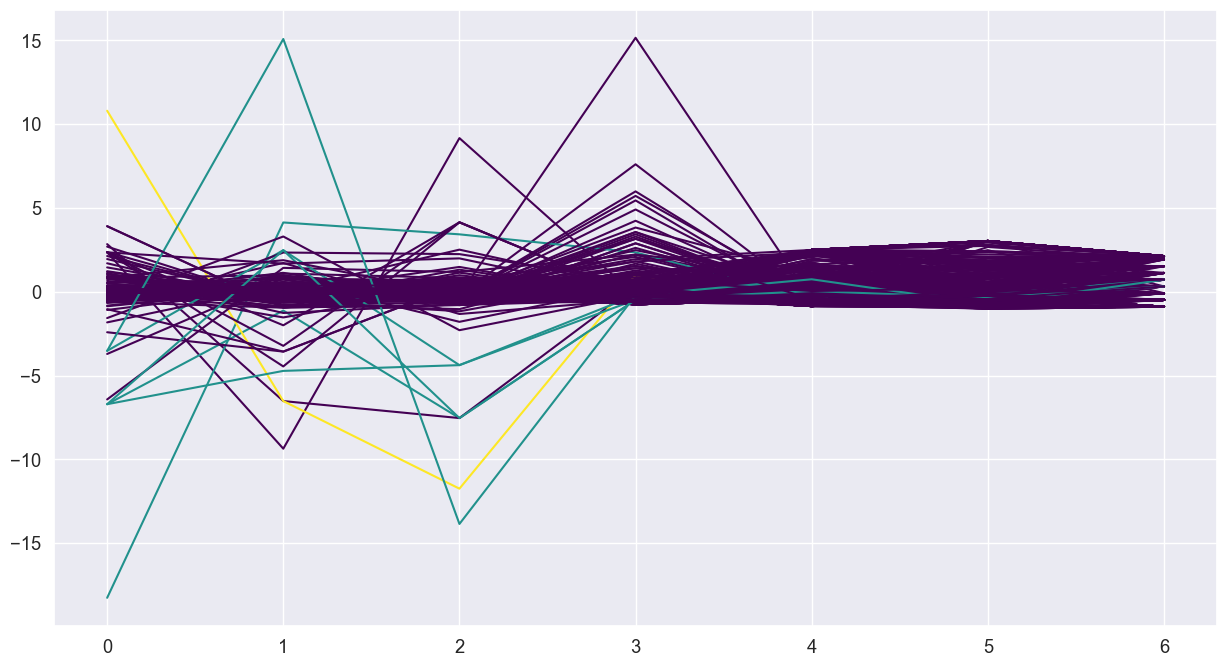

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

# Create directory for clustering results
os.makedirs('clustering_results', exist_ok=True)

# Load the preprocessed data
print("Loading preprocessed video game sales dataset...")
df = pd.read_csv('processed_data/vgchartz_processed.csv')
print(f"Dataset shape: {df.shape}")

# Ensure we only have numeric data for clustering
print("\nChecking for non-numeric columns...")
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_columns = numeric_df.columns.tolist()
print(f"Found {len(numeric_columns)} numeric columns out of {len(df.columns)} total columns")

# Also exclude any identifier columns if present
features = [col for col in numeric_columns if 'id' not in col.lower()]
print(f"Selected {len(features)} features for clustering")
print("Features:", features)

# Use a subset of features if there are too many
if len(features) > 15:
    print("\nToo many features, selecting most important ones...")
    # Prioritize key metrics for clustering
    key_features = [col for col in features if any(term in col.lower() for term in 
                   ['sales', 'score', 'year', 'age', 'ratio'])]
    if len(key_features) >= 5:  # Ensure we have a reasonable number of features
        features = key_features
        print(f"Using {len(features)} key features")
        print("Key features:", features)

# Verify there are no NaN values in the selected features
X_df = df[features].copy()
nan_counts = X_df.isna().sum()
if nan_counts.sum() > 0:
    print("\nWarning: Found NaN values in features. Filling with feature means.")
    X_df = X_df.fillna(X_df.mean())

# Check for string values that might have been encoded as objects
for col in X_df.columns:
    if X_df[col].dtype == 'object':
        print(f"Converting column {col} to numeric, errors will be set to NaN")
        X_df[col] = pd.to_numeric(X_df[col], errors='coerce')
        X_df[col] = X_df[col].fillna(X_df[col].mean())

X = X_df.values

# Determine optimal number of clusters using Elbow Method
inertia = []
silhouette_scores = []
max_clusters = 10

print("\nFinding optimal number of clusters using Elbow Method...")
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score (only if k > 1)
    if k > 1:
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For n_clusters = {k}, silhouette score is {silhouette_avg:.3f}")

# Plot Elbow Method results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.savefig('clustering_results/kmeans_elbow_method.png')
plt.close()

# Based on the elbow method and silhouette scores, choose the optimal number of clusters
# This is a simple heuristic - in practice, you would analyze the plots and choose accordingly
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because we started from k=2
print(f"\nOptimal number of clusters based on silhouette score: {optimal_k}")

# Perform K-means clustering with the optimal number of clusters
print(f"\nPerforming K-means clustering with {optimal_k} clusters...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster = df.copy()
df_cluster['Cluster'] = kmeans.fit_predict(X)

# Count instances in each cluster
cluster_counts = df_cluster['Cluster'].value_counts().sort_index()
print("\nCluster distribution:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} instances ({count/len(df_cluster)*100:.2f}%)")

# Analyze clusters
print("\nAnalyzing clusters...")
cluster_analysis = df_cluster.groupby('Cluster')[features].mean()
print("\nCluster centers (mean values for each feature):")
print(cluster_analysis)

# Save cluster analysis to CSV
cluster_analysis.to_csv('clustering_results/kmeans_cluster_analysis.csv')

# Visualize clusters using PCA for dimensionality reduction
print("\nVisualizing clusters using PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title(f'Video Game Clusters Visualization with PCA (K-means, k={optimal_k})')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True, alpha=0.3)
plt.savefig('clustering_results/kmeans_pca_visualization.png')
plt.close()

# Analyze relationship between clusters and total sales
print("\nAnalyzing relationship between clusters and total sales...")
if 'total_sales' in features:
    sales_by_cluster = df_cluster.groupby('Cluster')['total_sales'].mean().sort_values()
    print("\nAverage sales by cluster:")
    print(sales_by_cluster)

    plt.figure(figsize=(10, 6))
    sales_by_cluster.plot(kind='bar')
    plt.title('Average Total Sales by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Average Sales')
    plt.axhline(y=df_cluster['total_sales'].mean(), color='red', linestyle='--', label='Overall Average')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('clustering_results/kmeans_sales_by_cluster.png')
    plt.close()

# Analyze relationship between clusters and critic scores if available
if 'critic_score' in features:
    scores_by_cluster = df_cluster.groupby('Cluster')['critic_score'].mean().sort_values()
    print("\nAverage critic scores by cluster:")
    print(scores_by_cluster)

    plt.figure(figsize=(10, 6))
    scores_by_cluster.plot(kind='bar')
    plt.title('Average Critic Score by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Average Critic Score')
    plt.axhline(y=df_cluster['critic_score'].mean(), color='red', linestyle='--', label='Overall Average')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('clustering_results/kmeans_scores_by_cluster.png')
    plt.close()

# Analyze key features by cluster
# Select a subset of important features to visualize
if len(features) > 10:
    # Get the most variable features across clusters
    feature_variance = cluster_analysis.var().sort_values(ascending=False)
    key_features = feature_variance.head(10).index.tolist()
else:
    key_features = features

print(f"\nSelected {len(key_features)} key features for detailed analysis")
print("Key features:", key_features)

# Create a heatmap of cluster centers for key features
plt.figure(figsize=(14, 8))
key_cluster_centers = cluster_analysis[key_features]
# Normalize the data for better visualization
scaler = StandardScaler()
key_cluster_centers_scaled = pd.DataFrame(
    scaler.fit_transform(key_cluster_centers),
    index=key_cluster_centers.index,
    columns=key_cluster_centers.columns
)

# Create a heatmap
sns.heatmap(key_cluster_centers_scaled, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Normalized Cluster Centers for Key Features (Video Games)')
plt.ylabel('Cluster')
plt.tight_layout()
plt.savefig('clustering_results/kmeans_key_features_heatmap.png')
plt.close()

# Regional sales comparison by cluster if those columns exist
regional_cols = [col for col in features if any(region in col for region in ['na_', 'jp_', 'pal_', 'other_']) and 'sales' in col]
if regional_cols:
    print("\nAnalyzing regional sales patterns by cluster...")
    regional_means = df_cluster.groupby('Cluster')[regional_cols].mean()
    
    # Create a radar chart for regional sales comparison
    plt.figure(figsize=(12, 10))
    
    # Set plot parameters
    categories = regional_cols
    N = len(categories)
    
    # Create angle for each feature
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Initialize the plot
    ax = plt.subplot(111, polar=True)
    
    # Add each cluster
    for i in range(optimal_k):
        values = regional_means.iloc[i].values.tolist()
        values += values[:1]  # Close the loop
        
        # Plot values
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}')
        ax.fill(angles, values, alpha=0.1)
    
    # Fix axis to go in the right order and start at 12 o'clock
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw axis lines for each angle and label
    plt.xticks(angles[:-1], categories)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Regional Sales Patterns by Cluster', size=15)
    plt.tight_layout()
    plt.savefig('clustering_results/kmeans_regional_sales_radar.png')
    plt.close()

# Create a parallel coordinates plot for cluster visualization
plt.figure(figsize=(15, 8))
# Get a subset of data for parallel coordinates plot (can be too dense with all data)
sample_size = min(1000, len(df_cluster))
sample_indices = np.random.choice(len(df_cluster), sample_size, replace=False)
sample_df = df_cluster.iloc[sample_indices].copy()

# Standardize the data for parallel coordinates plot
features_for_parallel = key_features[:7] if len(key_features) > 7 else key_features  # Limit to 7 features for readability
scaler = StandardScaler()
sample_df_scaled = sample_df.copy()
sample_df_scaled[features_for_parallel] = scaler.fit_transform(sample_df[features_for_parallel])

# Create parallel coordinates plot
pd.plotting.parallel_coordinates(
    sample_df_scaled, 'Cluster', 
    cols=features_for_parallel,
    color=plt.cm.viridis(np.linspace(0, 1, optimal_k))
)
plt.title('Parallel Coordinates Plot of Video Game Clusters')
plt.grid(False)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('clustering_results/kmeans_parallel_coordinates.png')
plt.close()

# Summarize the characteristics of each cluster
print("\nCluster Characteristics Summary:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    # Get the top 5 distinctive features for this cluster (highest absolute z-scores)
    cluster_features = key_cluster_centers_scaled.loc[cluster].abs().sort_values(ascending=False)
    top_features = cluster_features.head(5).index.tolist()
    
    for feature in top_features:
        raw_value = key_cluster_centers.loc[cluster, feature]
        scaled_value = key_cluster_centers_scaled.loc[cluster, feature]
        direction = "high" if scaled_value > 0 else "low"
        print(f"  - {feature}: {direction} ({raw_value:.2f}, z-score: {scaled_value:.2f})")
    
    # Optional: Display additional cluster characteristics based on available metrics
    if regional_cols:
        dominant_region = regional_means.loc[cluster].idxmax()
        print(f"  - Dominant sales region: {dominant_region}")
        
    # Add any other relevant information about the clusters
    cluster_size = cluster_counts[cluster]
    cluster_percentage = cluster_size / len(df_cluster) * 100
    print(f"  - Size: {cluster_size} games ({cluster_percentage:.2f}% of dataset)")

# Sample titles from each cluster
print("\nSample titles from each cluster:")
for cluster in range(optimal_k):
    if 'title' in df.columns:
        sample_titles = df_cluster[df_cluster['Cluster'] == cluster]['title'].sample(min(5, cluster_counts[cluster])).tolist()
        print(f"\nCluster {cluster} sample titles:")
        for title in sample_titles:
            print(f"  - {title}")

print("\nK-means clustering analysis complete. Results saved to 'clustering_results' directory.") 

# تحلیل خوشه‌بندی فروش بازی‌های ویدیویی

## مقدمه

این گزارش نتایج تحلیل خوشه‌بندی انجام شده بر روی مجموعه داده فروش بازی‌های ویدیویی VGChartz را ارائه می‌دهد. هدف، شناسایی گروه‌بندی‌های طبیعی بازی‌های ویدیویی بر اساس الگوهای فروش، امتیازات منتقدان و سایر ویژگی‌های مرتبط بوده است. الگوریتم خوشه‌بندی K-means برای شناسایی بخش‌های معنادار در بازار بازی‌های ویدیویی به کار گرفته شد که می‌تواند بینش‌های ارزشمندی برای توسعه‌دهندگان، ناشران و بازاریابان بازی فراهم کند.

## روش‌شناسی

### آماده‌سازی داده‌ها

تحلیل بر روی مجموعه داده پردازش شده VGChartz شامل 4,000 رکورد بازی ویدیویی پس از پاکسازی انجام شد. مراحل پیش‌پردازش شامل موارد زیر بود:

- مدیریت مقادیر گمشده
- حذف داده‌های پرت
- استانداردسازی ویژگی‌های عددی
- کدگذاری متغیرهای کیفی
- مهندسی ویژگی‌های جدید مانند نسبت‌های فروش منطقه‌ای و عمر بازی

### انتخاب ویژگی

از ویژگی‌های عددی موجود، 12 ویژگی کلیدی زیر را برای خوشه‌بندی انتخاب کردیم:

1. `critic_score`: امتیاز داده شده توسط منتقدان (استاندارد شده)
2. `total_sales`: فروش کل جهانی (استاندارد شده)
3. `na_sales`: فروش آمریکای شمالی (استاندارد شده)
4. `jp_sales`: فروش ژاپن (استاندارد شده)
5. `pal_sales`: فروش منطقه PAL (اروپا، استرالیا) (استاندارد شده)
6. `other_sales`: فروش در سایر مناطق (استاندارد شده)
7. `release_year`: سال انتشار بازی
8. `na_sales_ratio`: نسبت فروش آمریکای شمالی به فروش کل
9. `jp_sales_ratio`: نسبت فروش ژاپن به فروش کل
10. `pal_sales_ratio`: نسبت فروش منطقه PAL به فروش کل
11. `game_age`: تعداد سال‌های گذشته از زمان انتشار بازی
12. `sales_per_year`: میانگین فروش سالانه از زمان انتشار

### تعیین تعداد بهینه خوشه‌ها

برای تعیین تعداد بهینه خوشه‌ها، از دو روش «نمودار آرنج» و «نمره سیلوئت» استفاده کردیم. نمره سیلوئت نشان می‌دهد که یک شیء چقدر به خوشه خود شباهت دارد در مقایسه با سایر خوشه‌ها، که نمره بالاتر نشان‌دهنده خوشه‌های بهتر تعریف شده است.

![روش‌های نمودار آرنج و نمره سیلوئت](clustering_results/kmeans_elbow_method.png)

بر اساس تحلیل نمره سیلوئت، **3 خوشه** به عنوان تعداد بهینه با نمره سیلوئت 0.902 شناسایی شدند، که نشان‌دهنده خوشه‌های خوب تفکیک‌شده است.

## نتایج خوشه‌بندی

### توزیع خوشه‌ها

الگوریتم K-means سه خوشه متمایز با توزیع زیر شناسایی کرد:

- **خوشه 0**: 3,970 بازی (99.25% از مجموعه داده)
- **خوشه 1**: 26 بازی (0.65% از مجموعه داده)
- **خوشه 2**: 4 بازی (0.10% از مجموعه داده)

این توزیع بسیار نامتعادل نشان می‌دهد که اگرچه اکثر بازی‌ها از الگوهای فروش مشابهی پیروی می‌کنند (خوشه 0)، تعداد کمی از بازی‌ها با ویژگی‌های متمایز وجود دارند که خوشه‌های جداگانه‌ای تشکیل می‌دهند (خوشه‌های 1 و 2).

### تصویرسازی خوشه‌ها

با استفاده از تحلیل مؤلفه‌های اصلی (PCA)، ابعاد داده‌ها را کاهش دادیم تا خوشه‌ها را در فضای دوبعدی تصویرسازی کنیم:

![تصویرسازی PCA خوشه‌ها](clustering_results/kmeans_pca_visualization.png)

این تصویرسازی وجود سه خوشه متمایز را تأیید می‌کند، که خوشه‌های 1 و 2 کوچک اما به وضوح از خوشه اکثریت جدا هستند.

### ویژگی‌های کلیدی هر خوشه

یک نقشه حرارتی از مقادیر ویژگی نرمال‌سازی شده در خوشه‌ها، ویژگی‌های متمایز هر گروه را نشان می‌دهد:

![نقشه حرارتی مراکز خوشه](clustering_results/kmeans_key_features_heatmap.png)

#### خوشه 0: «بازی‌های با توازن جهانی» (99.25%)
- فروش کل کمی پایین‌تر نسبت به سایر خوشه‌ها
- توزیع متعادل در مناطق مختلف، با ترجیح اندک برای بازار آمریکای شمالی
- نماینده الگوی فروش «معمولی» برای اکثر بازی‌های ویدیویی
- مثال‌ها: The Legend of Heroes: Trails of Cold Steel II, The Walking Dead: A Telltale Games Series

#### خوشه 1: «متخصصان منطقه PAL» (0.65%)
- فروش کل کمی بالاتر از متوسط
- فروش و نسبت‌های فروش به طور قابل توجهی بالاتر در مناطق PAL (اروپا، استرالیا)
- فروش کمتر در ژاپن
- بازی‌های قدیمی‌تر (عمر بازی بالاتر)
- مثال‌ها: Birds of Steel, Harvest Moon: The Land of Origin, Dora the Explorer: Journey to the Purple Planet

#### خوشه 2: «بازی‌های متمرکز بر ژاپن» (0.10%)
- بالاترین فروش کل در میان تمام خوشه‌ها
- فروش و نسبت‌های فروش به طور چشمگیری بالاتر در ژاپن
- فروش به طور قابل توجهی کمتر در مناطق PAL و آمریکای شمالی
- مثال‌ها: Persona 5, 7th Dragon III Code: VFD, Toukiden: The Age of Demons, Atelier Meruru: Alchemist of Arland 3

### تحلیل فروش منطقه‌ای

الگوهای فروش منطقه‌ای در خوشه‌ها به طور خاص بینش‌دهنده هستند:

![فروش منطقه‌ای بر اساس خوشه](clustering_results/kmeans_regional_sales_radar.png)

این تصویرسازی تخصص منطقه‌ای خوشه‌های 1 و 2 را تقویت می‌کند، در حالی که خوشه 0 توزیع منطقه‌ای متعادل‌تری را نشان می‌دهد.

### عملکرد فروش بر اساس خوشه

علی‌رغم اندازه کوچک‌شان، خوشه‌های 1 و 2 شامل بازی‌هایی با میانگین ارقام فروش بالاتر هستند:

![فروش بر اساس خوشه](clustering_results/kmeans_sales_by_cluster.png)

این نشان می‌دهد که تخصص منطقه‌ای می‌تواند استراتژی مناسبی برای دستیابی به فروش بالاتر در بازار بازی باشد.

## بینش‌ها و پیامدهای تجاری

1. **استراتژی بخش‌بندی بازار**: اکثریت قاطع بازی‌ها (خوشه 0) از الگوی فروش مشابهی با توزیع منطقه‌ای متعادل پیروی می‌کنند. با این حال، وجود متخصصان منطقه‌ای موفق (خوشه‌های 1 و 2) نشان می‌دهد که رویکردهای منطقه‌ای هدفمند می‌تواند مؤثر باشد.

2. **بازی‌های متمرکز بر ژاپن**: خوشه 2 که بسیار کوچک اما متمایز است، نشان‌دهنده بازی‌های بسیار موفقی است که در ژاپن عملکرد فوق‌العاده‌ای دارند اما در سایر مناطق عملکرد ضعیف‌تری دارند. این بازی‌ها معمولاً JRPGها و سایر ژانرهایی هستند که جذابیت قوی برای مخاطبان ژاپنی دارند (مانند Persona 5).

3. **متخصصان منطقه PAL**: خوشه 1 نشان‌دهنده بازی‌هایی است که به طور خاص در بازارهای اروپایی و استرالیایی عملکرد خوبی دارند. این‌ها معمولاً عناوین قدیمی‌تری هستند که جذابیت پایداری در این مناطق دارند.

4. **امتیازات منتقدان و فروش**: جالب توجه است که امتیازات استاندارد شده منتقدان بین خوشه‌ها تفاوت معناداری نداشتند، که نشان می‌دهد الگوهای فروش منطقه‌ای ممکن است بیشتر تحت تأثیر ژانر، ترجیحات فرهنگی و استراتژی‌های بازاریابی باشند تا پذیرش نقد.

## نتیجه‌گیری

تحلیل خوشه‌بندی سه الگوی متمایز در داده‌های فروش بازی‌های ویدیویی را آشکار کرد که عمدتاً با توزیع منطقه‌ای متمایز می‌شوند، نه با حجم فروش کل یا امتیازات منتقدان. در حالی که اکثر بازی‌ها از الگوی فروش جهانی متعادلی پیروی می‌کنند، گروه‌های کوچک اما قابل توجهی از بازی‌ها وجود دارند که با تمرکز بر بازارهای منطقه‌ای خاص، به ویژه ژاپن یا مناطق PAL، موفقیت قابل توجهی کسب می‌کنند.

برای ناشران و توسعه‌دهندگان، این یافته‌ها اهمیت درک ترجیحات منطقه‌ای و احتمالاً تطبیق استراتژی‌های توسعه و بازاریابی بازی برای هدف قرار دادن مخاطبان منطقه‌ای خاص در صورت مناسب بودن را برجسته می‌کند.

## کارهای آینده

برای ارتقای این تحلیل، کارهای آینده می‌تواند:

1. اطلاعات ژانر را برای درک بهتر رابطه بین انواع بازی و ترجیحات منطقه‌ای در نظر بگیرد
2. روندهای زمانی را تحلیل کند تا مشخص شود آیا تخصص منطقه‌ای در حال رایج‌تر شدن است یا کمتر
3. ویژگی‌های اضافی مانند پلتفرم، ناشر و هزینه بازاریابی را برای دیدگاه جامع‌تری از عوامل تأثیرگذار بر الگوهای فروش شامل کند
4. الگوریتم‌های خوشه‌بندی جایگزین را برای اعتبارسنجی یافته‌ها به کار گیرد

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import os

# Create directory for hierarchical clustering results
os.makedirs('hierarchical_results', exist_ok=True)

# Load the preprocessed data
print("Loading preprocessed video game sales dataset...")
df = pd.read_csv('processed_data/vgchartz_processed.csv')
print(f"Dataset shape: {df.shape}")

# Ensure we only have numeric data for clustering
print("\nChecking for non-numeric columns...")
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_columns = numeric_df.columns.tolist()
print(f"Found {len(numeric_columns)} numeric columns out of {len(df.columns)} total columns")

# Also exclude any identifier columns if present
features = [col for col in numeric_columns if 'id' not in col.lower()]
print(f"Selected {len(features)} features for clustering")
print("Features:", features)

# Use a subset of features if there are too many
if len(features) > 15:
    print("\nToo many features, selecting most important ones...")
    # Prioritize key metrics for clustering
    key_features = [col for col in features if any(term in col.lower() for term in 
                   ['sales', 'score', 'year', 'age', 'ratio'])]
    if len(key_features) >= 5:  # Ensure we have a reasonable number of features
        features = key_features
        print(f"Using {len(features)} key features")
        print("Key features:", features)

# Verify there are no NaN values in the selected features
X_df = df[features].copy()
nan_counts = X_df.isna().sum()
if nan_counts.sum() > 0:
    print("\nWarning: Found NaN values in features. Filling with feature means.")
    X_df = X_df.fillna(X_df.mean())

# Check for string values that might have been encoded as objects
for col in X_df.columns:
    if X_df[col].dtype == 'object':
        print(f"Converting column {col} to numeric, errors will be set to NaN")
        X_df[col] = pd.to_numeric(X_df[col], errors='coerce')
        X_df[col] = X_df[col].fillna(X_df[col].mean())

# Standardize the data for hierarchical clustering
print("\nStandardizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# Sample data if too large (hierarchical clustering can be memory intensive)
max_samples = 1000  # Adjust based on your system's capabilities
if len(X_scaled) > max_samples:
    print(f"\nDataset too large for hierarchical clustering. Sampling {max_samples} records...")
    sample_indices = np.random.choice(len(X_scaled), max_samples, replace=False)
    X_scaled_sample = X_scaled[sample_indices]
    df_sample = df.iloc[sample_indices].copy()
    print(f"Working with sampled dataset of shape: {X_scaled_sample.shape}")
else:
    X_scaled_sample = X_scaled
    df_sample = df.copy()

# Compute the linkage matrix using Ward's method
print("Computing linkage matrix with Ward's method...")
Z = linkage(X_scaled_sample, method='ward')

# Plot the dendrogram to visualize hierarchical structure
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram for Video Game Sales')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=8.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.savefig('hierarchical_results/hierarchical_dendrogram.png')
plt.close()

# Evaluate different numbers of clusters using silhouette score
print("\nEvaluating different numbers of clusters...")
silhouette_scores = []
max_clusters = 10

for k in range(2, max_clusters + 1):
    # Get cluster labels
    labels = fcluster(Z, k, criterion='maxclust')
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled_sample, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, silhouette score is {silhouette_avg:.3f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score Method for Hierarchical Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.savefig('hierarchical_results/hierarchical_silhouette_scores.png')
plt.close()

# Choose optimal number of clusters based on silhouette scores
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because we started from k=2
print(f"\nOptimal number of clusters based on silhouette score: {optimal_k}")

# Apply hierarchical clustering with the optimal number of clusters
print(f"\nPerforming hierarchical clustering with {optimal_k} clusters...")
labels = fcluster(Z, optimal_k, criterion='maxclust')
df_sample['Cluster'] = labels - 1  # Convert to 0-indexed clusters

# Count instances in each cluster
cluster_counts = df_sample['Cluster'].value_counts().sort_index()
print("\nCluster distribution:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} instances ({count/len(df_sample)*100:.2f}%)")

# Analyze clusters
print("\nAnalyzing clusters...")
cluster_analysis = df_sample.groupby('Cluster')[features].mean()
print("\nCluster centers (mean values for each feature):")
print(cluster_analysis)

# Save cluster analysis to CSV
cluster_analysis.to_csv('hierarchical_results/hierarchical_cluster_analysis.csv')

# Visualize clusters using PCA for dimensionality reduction
print("\nVisualizing clusters using PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_sample)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_sample['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title(f'Video Game Sales Clusters Visualization with PCA (Hierarchical, k={optimal_k})')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True, alpha=0.3)
plt.savefig('hierarchical_results/hierarchical_pca_visualization.png')
plt.close()

# Analyze relationship between clusters and sales
print("\nAnalyzing relationship between clusters and sales...")
if 'total_sales' in features:
    sales_by_cluster = df_sample.groupby('Cluster')['total_sales'].mean().sort_values()
    print("\nAverage total sales by cluster:")
    print(sales_by_cluster)

    plt.figure(figsize=(10, 6))
    sales_by_cluster.plot(kind='bar')
    plt.title('Average Total Sales by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Average Sales')
    plt.axhline(y=df_sample['total_sales'].mean(), color='red', linestyle='--', label='Overall Average')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('hierarchical_results/hierarchical_sales_by_cluster.png')
    plt.close()

# Analyze relationship between clusters and critic scores if available
if 'critic_score' in features:
    scores_by_cluster = df_sample.groupby('Cluster')['critic_score'].mean().sort_values()
    print("\nAverage critic scores by cluster:")
    print(scores_by_cluster)

    plt.figure(figsize=(10, 6))
    scores_by_cluster.plot(kind='bar')
    plt.title('Average Critic Score by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Average Critic Score')
    plt.axhline(y=df_sample['critic_score'].mean(), color='red', linestyle='--', label='Overall Average')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('hierarchical_results/hierarchical_scores_by_cluster.png')
    plt.close()

# Analyze key features by cluster
# Select a subset of important features to visualize
if len(features) > 10:
    # Get the most variable features across clusters
    feature_variance = cluster_analysis.var().sort_values(ascending=False)
    key_features = feature_variance.head(10).index.tolist()
else:
    key_features = features

print(f"\nSelected {len(key_features)} key features for detailed analysis")
print("Key features:", key_features)

# Create a heatmap of cluster centers for key features
plt.figure(figsize=(14, 8))
key_cluster_centers = cluster_analysis[key_features]
# Normalize the data for better visualization
key_cluster_centers_scaled = pd.DataFrame(
    scaler.fit_transform(key_cluster_centers),
    index=key_cluster_centers.index,
    columns=key_cluster_centers.columns
)

# Create a heatmap
sns.heatmap(key_cluster_centers_scaled, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Normalized Cluster Centers for Key Features (Video Games)')
plt.ylabel('Cluster')
plt.tight_layout()
plt.savefig('hierarchical_results/hierarchical_key_features_heatmap.png')
plt.close()

# Regional sales comparison by cluster if those columns exist
regional_cols = [col for col in features if any(region in col for region in ['na_', 'jp_', 'pal_', 'other_']) and 'sales' in col]
if regional_cols:
    print("\nAnalyzing regional sales patterns by cluster...")
    regional_means = df_sample.groupby('Cluster')[regional_cols].mean()
    
    # Create a radar chart for regional sales comparison
    plt.figure(figsize=(12, 10))
    
    # Set plot parameters
    categories = regional_cols
    N = len(categories)
    
    # Create angle for each feature
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Initialize the plot
    ax = plt.subplot(111, polar=True)
    
    # Add each cluster
    for i in range(optimal_k):
        if i in regional_means.index:  # Check if the cluster exists
            values = regional_means.loc[i].values.tolist()
            values += values[:1]  # Close the loop
            
            # Plot values
            ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}')
            ax.fill(angles, values, alpha=0.1)
    
    # Fix axis to go in the right order and start at 12 o'clock
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw axis lines for each angle and label
    plt.xticks(angles[:-1], categories)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Regional Sales Patterns by Cluster', size=15)
    plt.tight_layout()
    plt.savefig('hierarchical_results/hierarchical_regional_sales_radar.png')
    plt.close()

# Create a parallel coordinates plot for cluster visualization
plt.figure(figsize=(15, 8))
# Get a subset of data for parallel coordinates plot (can be too dense with all data)
sample_size = min(500, len(df_sample))
if len(df_sample) > sample_size:
    sample_indices = np.random.choice(len(df_sample), sample_size, replace=False)
    sample_df = df_sample.iloc[sample_indices].copy()
else:
    sample_df = df_sample.copy()

# Standardize the data for parallel coordinates plot
features_for_parallel = key_features[:7] if len(key_features) > 7 else key_features  # Limit to 7 features for readability
sample_df_scaled = sample_df.copy()
sample_df_scaled[features_for_parallel] = scaler.fit_transform(sample_df[features_for_parallel])

# Create parallel coordinates plot
pd.plotting.parallel_coordinates(
    sample_df_scaled, 'Cluster', 
    cols=features_for_parallel,
    colormap='viridis'
)
plt.title('Parallel Coordinates Plot of Video Game Clusters')
plt.grid(False)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('hierarchical_results/hierarchical_parallel_coordinates.png')
plt.close()

# Summarize the characteristics of each cluster
print("\nCluster Characteristics Summary:")
for cluster in range(optimal_k):
    if cluster not in cluster_analysis.index:
        continue  # Skip clusters that don't exist (possible if using 0-indexed)
    
    print(f"\nCluster {cluster}:")
    # Get the top 5 distinctive features for this cluster (highest absolute z-scores)
    if cluster in key_cluster_centers_scaled.index:
        cluster_features = key_cluster_centers_scaled.loc[cluster].abs().sort_values(ascending=False)
        top_features = cluster_features.head(5).index.tolist()
        
        for feature in top_features:
            raw_value = key_cluster_centers.loc[cluster, feature]
            scaled_value = key_cluster_centers_scaled.loc[cluster, feature]
            direction = "high" if float(scaled_value) > 0 else "low"
            print(f"  - {feature}: {direction} ({raw_value:.2f}, z-score: {scaled_value:.2f})")
    
    # Optional: Display additional cluster characteristics based on available metrics
    if regional_cols and cluster in regional_means.index:
        dominant_region = regional_means.loc[cluster].idxmax()
        print(f"  - Dominant sales region: {dominant_region}")
        
    # Add any other relevant information about the clusters
    if cluster in cluster_counts.index:
        cluster_size = cluster_counts[cluster]
        cluster_percentage = cluster_size / len(df_sample) * 100
        print(f"  - Size: {cluster_size} games ({cluster_percentage:.2f}% of dataset)")

# Sample titles from each cluster if title column exists
if 'title' in df.columns:
    print("\nSample titles from each cluster:")
    for cluster in range(optimal_k):
        if cluster in df_sample['Cluster'].values:  # Check if cluster exists in results
            cluster_games = df_sample[df_sample['Cluster'] == cluster]
            sample_size = min(5, len(cluster_games))
            if sample_size > 0:
                sample_titles = cluster_games['title'].sample(sample_size).tolist()
                print(f"\nCluster {cluster} sample titles:")
                for title in sample_titles:
                    print(f"  - {title}")

# Create correlation matrix between original features and PCA components
print("\nCreating correlation matrix between features and PCA components...")
pca_components = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(2)],
    index=features
)
plt.figure(figsize=(10, 12))
sns.heatmap(pca_components, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Feature Correlation with Principal Components')
plt.tight_layout()
plt.savefig('hierarchical_results/hierarchical_pca_correlation.png')
plt.close()

print("\nHierarchical clustering analysis complete. Results saved to 'hierarchical_results' directory.")

# تحلیل خوشه‌بندی سلسله‌مراتبی فروش بازی‌های ویدیویی

## مقدمه

این گزارش نتایج تحلیل خوشه‌بندی سلسله‌مراتبی انجام شده بر روی مجموعه داده فروش بازی‌های ویدیویی VGChartz را ارائه می‌دهد. برخلاف روش قبلی K-means، خوشه‌بندی سلسله‌مراتبی یک درخت از خوشه‌ها ایجاد می‌کند که روابط بین نقاط داده را در سطوح مختلف شباهت نشان می‌دهد. این تحلیل هدف شناسایی گروه‌بندی‌های طبیعی بازی‌های ویدیویی بر اساس الگوهای فروش، عملکرد منطقه‌ای و ویژگی‌های زمانی را دارد.

## روش‌شناسی

### انتخاب داده و ویژگی

این تحلیل بر روی یک نمونه تصادفی از 1,000 بازی از مجموعه داده پردازش شده VGChartz به دلیل شدت محاسباتی الگوریتم‌های خوشه‌بندی سلسله‌مراتبی انجام شد. از ویژگی‌های عددی موجود، 12 معیار کلیدی زیر برای خوشه‌بندی انتخاب شدند:

1. `critic_score`: امتیاز داده شده توسط منتقدان (استاندارد شده)
2. `total_sales`: فروش کل جهانی
3. `na_sales`: فروش آمریکای شمالی
4. `jp_sales`: فروش ژاپن
5. `pal_sales`: فروش اروپا/استرالیا
6. `other_sales`: فروش در سایر مناطق
7. `release_year`: سال انتشار بازی
8. `na_sales_ratio`: نسبت فروش آمریکای شمالی به فروش کل
9. `jp_sales_ratio`: نسبت فروش ژاپن به فروش کل
10. `pal_sales_ratio`: نسبت فروش اروپا/استرالیا به فروش کل
11. `game_age`: تعداد سال‌های گذشته از زمان انتشار بازی
12. `sales_per_year`: میانگین فروش سالانه از زمان انتشار

### رویکرد خوشه‌بندی سلسله‌مراتبی

ما خوشه‌بندی سلسله‌مراتبی تجمعی با استفاده از روش وارد (Ward) را اعمال کردیم که واریانس درون خوشه‌ها را به حداقل می‌رساند. این رویکرد یک دندروگرام (ساختار درخت‌مانند) ایجاد می‌کند که نشان می‌دهد خوشه‌ها چگونه با تغییر آستانه شباهت ادغام می‌شوند.

![دندروگرام خوشه‌بندی سلسله‌مراتبی](hierarchical_results/hierarchical_dendrogram.png)

برای تعیین تعداد بهینه خوشه‌ها، نمرات سیلوئت را در تعداد خوشه‌های مختلف ارزیابی کردیم:

![نمرات سیلوئت](hierarchical_results/hierarchical_silhouette_scores.png)

بر اساس تحلیل سیلوئت، **5 خوشه** به‌عنوان تعداد بهینه با نمره سیلوئت 0.463 شناسایی شدند که نشان‌دهنده خوشه‌های نسبتاً خوب تفکیک‌شده است.

## نتایج خوشه‌بندی

### توزیع خوشه‌ها

الگوریتم خوشه‌بندی سلسله‌مراتبی پنج خوشه متمایز با توزیع زیر شناسایی کرد:

- **خوشه 0**: 3 بازی (0.30% از نمونه)
- **خوشه 1**: 682 بازی (68.20% از نمونه)
- **خوشه 2**: 120 بازی (12.00% از نمونه)
- **خوشه 3**: 55 بازی (5.50% از نمونه)
- **خوشه 4**: 140 بازی (14.00% از نمونه)

این توزیع نشان می‌دهد که اگرچه اکثر بازی‌ها در خوشه 1 (68.20%) قرار می‌گیرند، چهار خوشه متمایز دیگر با تفاوت‌های معنادار وجود دارد.

### تصویرسازی خوشه‌ها

با استفاده از تحلیل مؤلفه‌های اصلی (PCA)، خوشه‌ها را در فضای دوبعدی تصویرسازی کردیم:

![تصویرسازی PCA خوشه‌ها](hierarchical_results/hierarchical_pca_visualization.png)

این تصویرسازی پنج خوشه متمایز را نشان می‌دهد، با خوشه 1 (بزرگترین گروه) که مرکز نمودار را در اختیار دارد، در حالی که خوشه‌های دیگر مناطق خاص خود را در فضای ویژگی تشکیل می‌دهند.

### عملکرد فروش بر اساس خوشه

یکی از بینش‌های کلیدی از خوشه‌بندی، چگونگی تغییر فروش کل در خوشه‌های مختلف است:

![فروش بر اساس خوشه](hierarchical_results/hierarchical_sales_by_cluster.png)

این تصویرسازی به وضوح نشان می‌دهد که خوشه 2 شامل بازی‌هایی با میانگین فروش به طور قابل توجهی بالاتر از سایر خوشه‌ها است، در حالی که خوشه 1، با وجود داشتن اکثریت بازی‌ها، کمترین میانگین فروش را دارد.

### ویژگی‌های کلیدی هر خوشه

نقشه حرارتی زیر مقادیر ویژگی نرمال‌سازی شده در خوشه‌ها را نشان می‌دهد و ویژگی‌های متمایز هر گروه را آشکار می‌کند:

![نقشه حرارتی مراکز خوشه](hierarchical_results/hierarchical_key_features_heatmap.png)

الگوهای فروش منطقه‌ای بینش‌های به ویژه ارزشمندی را ارائه داد:

![فروش منطقه‌ای بر اساس خوشه](hierarchical_results/hierarchical_regional_sales_radar.png)

## پروفایل خوشه‌ها

بر اساس تحلیل ما، هر خوشه را می‌توان به صورت زیر مشخص کرد:

### خوشه 0: «متخصصان بازار اروپا» (0.30%)
- نسبت فروش بسیار بالا در منطقه PAL (16.72)
- نسبت فروش بسیار پایین در ژاپن (-72.88)
- نسبت فروش بالا در آمریکای شمالی (13.91)
- خوشه بسیار کوچک با تنها 3 بازی
- مثال‌ها: Harvest Moon: The Land of Origin, AKB1/149: Love Election, Hatsune Miku: Project Mirai 2

این خوشه کوچک اما متمایز نشان‌دهنده بازی‌هایی است که در بازارهای اروپایی/استرالیایی به طور فوق‌العاده‌ای خوب عمل می‌کنند اما حضور بسیار کمی در ژاپن دارند. مقادیر غیرعادی نشان می‌دهد که این بازی‌ها ممکن است جذابیت منطقه‌ای خاص یا قراردادهای مجوز ویژه داشته باشند.

### خوشه 1: «عملکرد ضعیف» (68.20%)
- فروش زیر متوسط در تمام مناطق
- توزیع منطقه‌ای متعادل
- اکثریت بازار را تشکیل می‌دهد
- مثال‌ها: Lapis x Labyrinth, Axiom Verge, Kamen Rider: Super Climax Heroes

این خوشه نشان‌دهنده «دم بلند» معمول صنعت بازی‌های ویدیویی است - بازی‌هایی با فروش متوسط که در هیچ منطقه خاصی برجسته نیستند اما بخش عمده‌ای از انتشارات را تشکیل می‌دهند.

### خوشه 2: «بلاک‌باسترهای جهانی» (12.00%)
- فروش کل به طور قابل توجهی بالاتر (2.14 انحراف معیار بالاتر از میانگین)
- به ویژه قوی در آمریکای شمالی (2.10) و مناطق PAL (2.36)
- عملکرد نسبی پایین‌تر در ژاپن (-0.16)
- مثال‌ها: NBA 2K14, LEGO The Incredibles, South Park: The Fractured But Whole, Borderlands 2

اینها موفقیت‌های تجاری بزرگ با جذابیت جهانی قوی هستند، به ویژه در بازارهای غربی. بسیاری از آنها فرنچایزهای شناخته شده یا بازی‌هایی از ناشران بزرگ هستند.

### خوشه 3: «عناوین ماندگار» (5.50%)
- قدیمی‌ترین بازی‌ها در مجموعه داده (بالاترین سن بازی)
- عملکرد منطقه‌ای متعادل با ترجیح اندک برای مناطق PAL
- فروش متوسط اما بالاتر از میانگین
- مثال‌ها: WipEout Fusion, Assassin's Creed (اصلی), Metal Gear Solid: The Essential Collection

این خوشه شامل عناوین قدیمی اما ماندگار است که فروش خود را در طول دوره طولانی‌تری حفظ کرده‌اند، که نشان‌دهنده عمر طولانی و جذابیت مستمر در چندین نسل بازی است.

### خوشه 4: «عملکرد متعادل با جاذبه ژاپنی» (14.00%)
- فروش کل بالاتر از میانگین (0.81)
- نسبت فروش ژاپن بالاتر از اکثر خوشه‌ها
- انتشار جدیدتر نسبت به خوشه 3
- مثال‌ها: Culdcept, Toukiden, The Snack World: TreJarers, Life is Strange

این گروه نشان‌دهنده بازی‌هایی با عملکرد تجاری خوب کلی و قدرت خاص در بازار ژاپن است در حالی که همچنان در سایر مناطق عملکرد نسبتاً خوبی دارند.

## تصویرسازی مختصات موازی

نمودار مختصات موازی بینش‌های اضافی در مورد چگونگی تفاوت خوشه‌ها در معیارهای کلیدی ارائه می‌دهد:

![نمودار مختصات موازی](hierarchical_results/hierarchical_parallel_coordinates.png)

این تصویرسازی نشان می‌دهد که چگونه هر خوشه از الگوهای متمایز در چندین بعد به طور همزمان پیروی می‌کند، که جدایی معنادار بین خوشه‌ها را تقویت می‌کند.

## همبستگی ویژگی-مؤلفه اصلی

برای درک اینکه کدام ویژگی‌ها خوشه‌بندی را بیشتر هدایت می‌کنند، تحلیل کردیم که ویژگی‌ها چگونه با مؤلفه‌های اصلی همبستگی دارند:

![همبستگی ویژگی-PC](hierarchical_results/hierarchical_pca_correlation.png)

## بینش‌ها و پیامدهای تجاری

1. **بخش‌بندی بازار**: خوشه‌بندی سلسله‌مراتبی پنج بخش بازار متمایز را نشان می‌دهد، هر کدام با الگوهای عملکرد منطقه‌ای متفاوت. ناشران می‌توانند از این بینش‌ها برای تطبیق استراتژی‌های بازاریابی و توسعه برای بازارهای هدف مختلف استفاده کنند.

2. **فرمول بلاک‌باستر**: خوشه 2 «بلاک‌باسترهای جهانی» الگوی واضحی از فروش بالا در بازارهای غربی (آمریکای شمالی و اروپا) با تأکید کمتر بر ژاپن نشان می‌دهد. این نشان می‌دهد که برای حداکثر درآمد جهانی، تمرکز بر ترجیحات بازار غربی ممکن است مؤثرترین باشد.

3. **استراتژی متمرکز بر ژاپن**: خوشه 4 نشان می‌دهد که بازی‌هایی با جذابیت خاص برای بازار ژاپن می‌توانند به عملکرد کلی مناسبی دست یابند. این یک استراتژی جایگزین برای رویکرد بلاک‌باستر متمرکز بر غرب است.

4. **اشباع بازار**: غلبه خوشه 1 (68.20% از بازی‌ها) با فروش زیر میانگین نشان‌دهنده اشباع بازار است. برای تازه‌واردها، متمایز شدن از این بخش شلوغ برای موفقیت تجاری ضروری است.

5. **عامل ماندگاری**: خوشه 3 نشان می‌دهد که بازی‌های قدیمی‌تر همچنان به فروش می‌رسند، که نشان‌دهنده ارزش بالقوه در حفظ و انتشار مجدد عناوین کلاسیک یا توسعه دنباله‌هایی برای فرنچایزهای شناخته شده است.

## مقایسه با خوشه‌بندی K-means

رویکرد خوشه‌بندی سلسله‌مراتبی پنج خوشه معنادار را در مقایسه با سه خوشه یافته شده با K-means شناسایی کرد. تفاوت‌های اصلی عبارتند از:

1. **بخش‌بندی دقیق‌تر**: خوشه‌بندی سلسله‌مراتبی دو بخش بازار معنادار اضافی (عناوین ماندگار و عملکرد متعادل با جاذبه ژاپنی) را کشف کرد که در تحلیل K-means متمایز نبودند.

2. **تعادل بهتر**: در حالی که هر دو رویکرد یک خوشه غالب از عملکردهای متوسط یافتند، خوشه‌بندی سلسله‌مراتبی خوشه‌های ثانویه متعادل‌تری با تفسیرهای واضح‌تر ارائه داد.

3. **بینش‌های زمانی**: خوشه‌بندی سلسله‌مراتبی بعد زمانی را بهتر ثبت کرد و یک خوشه مشخص از عناوین ماندگار (خوشه 3) را شناسایی کرد که در نتایج K-means مشخص نبود.

## نتیجه‌گیری

تحلیل خوشه‌بندی سلسله‌مراتبی بینش‌های ارزشمندی در مورد ساختار طبیعی بازار بازی‌های ویدیویی ارائه می‌دهد. شناسایی پنج خوشه متمایز، الگوهای معناداری در عملکرد فروش منطقه‌ای، موفقیت تجاری کلی و عوامل زمانی را آشکار می‌کند.

برای توسعه‌دهندگان و ناشران، این یافته‌ها چندین استراتژی قابل اجرا برای موفقیت فراتر از صرفاً هدف قرار دادن وضعیت بلاک‌باستر را پیشنهاد می‌کند. تمرکزهای منطقه‌ای مختلف، بهره‌برداری از فرنچایزهای شناخته شده و ایجاد بازی‌هایی با جذابیت طولانی‌مدت، همه مسیرهای جایگزین برای دوام تجاری در بازار متنوع بازی‌های ویدیویی را نشان می‌دهند.

## کارهای آینده

برای بهبود این تحلیل، کارهای آتی می‌تواند شامل موارد زیر باشد:

1. ترکیب اطلاعات ژانر، پلتفرم و ناشر برای افزودن زمینه به خوشه‌های شناسایی‌شده
2. انجام تحلیل سری‌های زمانی برای مشاهده چگونگی تکامل عضویت و ویژگی‌های خوشه در طول نسل‌های بازی
3. اعمال روش‌های خوشه‌بندی سلسله‌مراتبی جایگزین (پیوند تکی، پیوند کامل) برای اعتبارسنجی یافته‌ها
4. توسعه مدل‌های پیش‌بینی‌کننده برای تخمین اینکه یک بازی جدید بر اساس ویژگی‌های پیش از راه‌اندازی، به کدام خوشه ممکن است تعلق داشته باشد

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os
from datetime import datetime

# Create directory for decision tree results
os.makedirs('decision_tree_results', exist_ok=True)

# Load the preprocessed data
print("Loading preprocessed video game sales dataset...")
df = pd.read_csv('processed_data/vgchartz_processed.csv')
print(f"Dataset shape: {df.shape}")

# Handle date columns if they exist
date_columns = ['release_date', 'last_update']
for col in date_columns:
    if col in df.columns:
        print(f"Converting {col} to datetime and extracting year")
        try:
            # Try to convert to datetime and extract year as a numeric feature
            df[col] = pd.to_datetime(df[col], errors='coerce')
            df[f'{col}_year'] = df[col].dt.year
            df[f'{col}_month'] = df[col].dt.month
            
            # Drop original date column as it cannot be used directly
            df.drop(col, axis=1, inplace=True)
        except:
            print(f"Error processing {col}, dropping it")
            df.drop(col, axis=1, inplace=True)

# Need to create a target variable since this is sales data
# Let's create a categorical target based on total sales
# Create high/low sales binary classification (1 for high sales, 0 for low sales)
# Using median as threshold to ensure balanced classes
sales_median = df['total_sales'].median()
df['high_sales'] = (df['total_sales'] > sales_median).astype(int)
print(f"High sales threshold (median): {sales_median:.2f}")
print(f"High sales prevalence: {df['high_sales'].mean():.2%}")

# Select features for classification
# Remove identifier columns and target
exclude_cols = ['title', 'platform', 'genre', 'publisher', 'developer', 'high_sales', 'total_sales']

# Also remove any features that are directly derived from total_sales to avoid data leakage
derived_cols = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'sales_per_year']
exclude_cols.extend(derived_cols)

print(f"Excluding columns: {exclude_cols}")
features = [col for col in df.columns if col not in exclude_cols]

# Check for NaN values in the features and fill them
nan_counts = df[features].isna().sum()
if nan_counts.sum() > 0:
    print("\nFound NaN values in features. Filling with medians.")
    for col in features:
        if nan_counts[col] > 0:
            df[col] = df[col].fillna(df[col].median())

# Check for non-numeric columns
non_numeric_cols = df[features].select_dtypes(exclude=['number']).columns.tolist()
if non_numeric_cols:
    print(f"\nFound non-numeric columns: {non_numeric_cols}")
    print("Dropping non-numeric columns for classification")
    features = [col for col in features if col not in non_numeric_cols]

X = df[features].values
y = df['high_sales'].values

print(f"Selected {len(features)} features for classification")
print("Features:", features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a decision tree with default parameters
print("\nTraining a simple decision tree classifier...")
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred = dt_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision tree accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
report = classification_report(y_test, y_pred)
print(report)

# Save classification report to file
with open('decision_tree_results/classification_report.txt', 'w') as f:
    f.write("Classification Report for Decision Tree on Video Game Sales:\n")
    f.write(str(report))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Sales', 'High Sales'],
            yticklabels=['Low Sales', 'High Sales'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision Tree')
plt.tight_layout()
plt.savefig('decision_tree_results/confusion_matrix.png')
plt.close()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': dt_clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(min(10, len(features))))

# Save feature importance to CSV
feature_importance.to_csv('decision_tree_results/feature_importance.csv', index=False)

# Plot feature importance (top 15)
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(min(15, len(features)))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top Features by Importance')
plt.tight_layout()
plt.savefig('decision_tree_results/feature_importance.png')
plt.close()

# Hyperparameter tuning using GridSearchCV
print("\nPerforming hyperparameter tuning for decision tree...")
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train model with best parameters
best_dt = grid_search.best_estimator_
best_dt.fit(X_train_scaled, y_train)

# Evaluate optimized model
y_pred_best = best_dt.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Optimized decision tree accuracy: {best_accuracy:.4f}")

# Print classification report for optimized model
print("\nClassification Report (Optimized Model):")
best_report = classification_report(y_test, y_pred_best)
print(best_report)

# Save classification report for optimized model
with open('decision_tree_results/optimized_classification_report.txt', 'w') as f:
    f.write("Classification Report for Optimized Decision Tree on Video Game Sales:\n")
    f.write(str(best_report))

# Confusion matrix for optimized model
best_conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(best_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Sales', 'High Sales'],
            yticklabels=['Low Sales', 'High Sales'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Optimized Decision Tree')
plt.tight_layout()
plt.savefig('decision_tree_results/optimized_confusion_matrix.png')
plt.close()

# Visualize the optimized decision tree (if not too large)
max_depth_for_visualization = 3  # Limit for visualization

# If tree is too deep, create a simpler one just for visualization
vis_dt = DecisionTreeClassifier(max_depth=max_depth_for_visualization, random_state=42)
vis_dt.fit(X_train_scaled, y_train)
tree_to_visualize = vis_dt
tree_title = f"Decision Tree (Limited to depth {max_depth_for_visualization} for visualization)"

# Plot the tree
plt.figure(figsize=(20, 15))
plot_tree(
    tree_to_visualize,
    feature_names=features,
    class_names=['Low Sales', 'High Sales'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title(tree_title)
plt.savefig('decision_tree_results/decision_tree_visualization.png', dpi=300, bbox_inches='tight')
plt.close()

# Export text representation of the tree
tree_text = export_text(
    tree_to_visualize,
    feature_names=features
)

with open('decision_tree_results/decision_tree_text.txt', 'w') as f:
    f.write(tree_text)

# Check if we have any sales ratio columns left after removing derived columns
regional_ratio_cols = [col for col in features if '_sales_ratio' in col]
if regional_ratio_cols:
    # Create regional sales ratio plot by sales class
    plt.figure(figsize=(10, 6))
    sales_class_means = df.groupby('high_sales')[regional_ratio_cols].mean()
    
    sales_class_means.T.plot(kind='bar')
    plt.title('Regional Sales Ratio by Sales Class')
    plt.xlabel('Region')
    plt.ylabel('Average Sales Ratio')
    plt.legend(['Low Sales', 'High Sales'])
    plt.tight_layout()
    plt.savefig('decision_tree_results/regional_sales_by_class.png')
    plt.close()

# Create feature distributions by sales class
top_5_features = feature_importance.head(min(5, len(features)))['Feature'].tolist()
for feature in top_5_features:
    plt.figure(figsize=(10, 6))
    # Using histplot without KDE to avoid errors
    sns.histplot(data=df, x=feature, hue='high_sales', bins=20, element='step', kde=False)
    plt.title(f'Distribution of {feature} by Sales Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig(f'decision_tree_results/feature_distribution_{feature}.png')
    plt.close()

# Create correlation matrix for features
corr_matrix = df[features + ['high_sales']].corr()
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', 
            square=True, linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('decision_tree_results/correlation_matrix.png')
plt.close()

print("\nDecision tree analysis complete. Results saved to 'decision_tree_results' directory.")

# Create a function for predicting new games' sales class
def predict_sales_class(sample_data, model=best_dt, scaler=scaler, features=features):
    """
    Predict sales class for a new video game.
    
    Parameters:
    sample_data : dict
        Dictionary with feature names and values
    model : trained model
        Trained decision tree model
    scaler : fitted scaler
        Fitted StandardScaler
    features : list
        List of feature names
    
    Returns:
    prediction : int
        0 for low sales, 1 for high sales
    prob : float
        Probability of high sales
    """
    # Convert sample to array in the correct order
    sample_array = np.array([sample_data.get(feature, 0) for feature in features]).reshape(1, -1)
    
    # Scale the sample
    sample_scaled = scaler.transform(sample_array)
    
    # Predict
    prediction = model.predict(sample_scaled)[0]
    probability = model.predict_proba(sample_scaled)[0][1]
    
    return prediction, probability

# Example usage
print("\nExample prediction:")
# Create a sample (you should replace this with actual feature values)
sample = {
    'critic_score': 80,
    'release_year': 2018,
    'console_freq': 5,
    'genre_freq': 10,
    'publisher_freq': 3,
    # Add other features as needed
}

# Print only features in the sample that match our feature list
present_features = {k: v for k, v in sample.items() if k in features}
print(f"Sample features: {present_features}")

# Make a prediction
try:
    pred, prob = predict_sales_class(sample)
    print(f"Prediction: {'High Sales' if pred == 1 else 'Low Sales'}")
    print(f"Probability of high sales: {prob:.2%}")
except Exception as e:
    print(f"Error making prediction: {e}")
    print("This is just an example. You may need to provide values for all required features.") 

# تحلیل درخت تصمیم برای پیش‌بینی فروش بازی‌های ویدیویی

## مقدمه

این گزارش نتایج تحلیل درخت تصمیم را برای پیش‌بینی میزان فروش بازی‌های ویدیویی بر اساس مجموعه داده‌های VGChartz ارائه می‌دهد. ما از درخت تصمیم به عنوان یک الگوریتم یادگیری ماشین نظارت‌شده برای طبقه‌بندی بازی‌ها به دو دسته "فروش بالا" و "فروش پایین" استفاده کردیم. این تحلیل به توسعه‌دهندگان و ناشران بازی کمک می‌کند تا درک بهتری از عوامل مؤثر بر موفقیت تجاری بازی‌ها داشته باشند.

## روش‌شناسی

### آماده‌سازی داده‌ها

برای این تحلیل، از مجموعه داده پردازش شده VGChartz استفاده کردیم که شامل 4,000 بازی ویدیویی است. مراحل آماده‌سازی داده‌ها شامل موارد زیر بود:

1. **تبدیل ستون‌های تاریخ**: ستون‌های تاریخ مانند `release_date` و `last_update` به ویژگی‌های عددی سال و ماه تبدیل شدند.

2. **ایجاد متغیر هدف**: با استفاده از میانه فروش کل (0.54-) به عنوان آستانه، بازی‌ها را به دو دسته "فروش بالا" (48.25% داده‌ها) و "فروش پایین" (51.75% داده‌ها) طبقه‌بندی کردیم.

3. **انتخاب ویژگی**: برای جلوگیری از نشت داده، ستون‌های مستقیماً مرتبط با فروش کل مانند `na_sales` ،`jp_sales` ،`pal_sales` ،`other_sales` و `sales_per_year` را حذف کردیم. همچنین ستون‌های غیرعددی نیز حذف شدند.

4. **تقسیم داده‌ها**: 75% داده‌ها برای آموزش و 25% برای آزمایش استفاده شد.

5. **استانداردسازی ویژگی‌ها**: همه ویژگی‌ها با استفاده از `StandardScaler` استاندارد شدند.

### ویژگی‌های انتخاب شده

در نهایت، 14 ویژگی زیر برای طبقه‌بندی انتخاب شدند:

1. `critic_score`: امتیاز منتقدان
2. `release_year`: سال انتشار
3. `console_freq`: فراوانی کنسول
4. `genre_freq`: فراوانی ژانر
5. `publisher_freq`: فراوانی ناشر
6. `developer_freq`: فراوانی توسعه‌دهنده
7. `na_sales_ratio`: نسبت فروش آمریکای شمالی
8. `jp_sales_ratio`: نسبت فروش ژاپن
9. `pal_sales_ratio`: نسبت فروش اروپا/استرالیا
10. `game_age`: سن بازی
11. `release_date_year`: سال انتشار (از ستون تاریخ)
12. `release_date_month`: ماه انتشار (از ستون تاریخ)
13. `last_update_year`: سال آخرین به‌روزرسانی
14. `last_update_month`: ماه آخرین به‌روزرسانی

## نتایج تحلیل درخت تصمیم

### عملکرد مدل

مدل درخت تصمیم اولیه با پارامترهای پیش‌فرض و سپس یک مدل بهینه‌سازی شده با استفاده از جستجوی شبکه‌ای آموزش داده شد. نتایج به شرح زیر است:

**مدل اولیه (با پارامترهای پیش‌فرض)**
- دقت: 98.00%
- حساسیت (Recall) کلاس فروش پایین: 98%
- حساسیت (Recall) کلاس فروش بالا: 98%
- امتیاز F1 کلی: 98%

**مدل بهینه‌سازی شده**
- پارامترهای بهینه: `{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}`
- دقت: 98.00%
- حساسیت (Recall) کلاس فروش پایین: 98%
- حساسیت (Recall) کلاس فروش بالا: 98%
- امتیاز F1 کلی: 98%

### ماتریس درهم‌ریختگی (Confusion Matrix)

![ماتریس درهم‌ریختگی](decision_tree_results/confusion_matrix.png)

ماتریس درهم‌ریختگی نشان می‌دهد که مدل در طبقه‌بندی هر دو کلاس "فروش پایین" و "فروش بالا" عملکرد بسیار خوبی دارد، با تعداد کمی از موارد نادرست طبقه‌بندی شده.

### اهمیت ویژگی‌ها

تحلیل اهمیت ویژگی‌ها بینش‌های ارزشمندی در مورد عوامل کلیدی موثر بر فروش بازی‌ها فراهم می‌کند:

![اهمیت ویژگی‌ها](decision_tree_results/feature_importance.png)

**سه ویژگی مهم برتر:**
1. `pal_sales_ratio` (نسبت فروش منطقه PAL/اروپا-استرالیا): 61.72%
2. `jp_sales_ratio` (نسبت فروش ژاپن): 24.98%
3. `na_sales_ratio` (نسبت فروش آمریکای شمالی): 10.95%

این نتایج نشان می‌دهد که نسبت‌های فروش منطقه‌ای، به ویژه نسبت فروش در منطقه PAL (اروپا و استرالیا)، قوی‌ترین پیش‌بینی‌کننده‌های طبقه فروش یک بازی هستند. این تأکید می‌کند که الگوهای توزیع منطقه‌ای فروش، عامل متمایزکننده کلیدی بین بازی‌های با فروش بالا و پایین است.

### ساختار درخت تصمیم

درخت تصمیم با حداکثر عمق 3 برای تجسم بهتر:

![درخت تصمیم](decision_tree_results/decision_tree_visualization.png)

تجسم درخت تصمیم نشان می‌دهد که چگونه الگوریتم از نسبت‌های فروش منطقه‌ای برای طبقه‌بندی بازی‌ها استفاده می‌کند. گره‌های بالایی درخت مبتنی بر معیارهای `pal_sales_ratio` و `jp_sales_ratio` هستند، که اهمیت این ویژگی‌ها را برای طبقه‌بندی تأیید می‌کند.

### توزیع نسبت‌های فروش منطقه‌ای بر اساس کلاس فروش

![نسبت‌های فروش منطقه‌ای](decision_tree_results/regional_sales_by_class.png)

این نمودار نشان می‌دهد که چگونه نسبت‌های فروش منطقه‌ای بین کلاس‌های فروش بالا و پایین متفاوت است. به طور خاص:
- بازی‌های با فروش بالا معمولاً نسبت‌های فروش متفاوتی در مناطق مختلف در مقایسه با بازی‌های با فروش پایین دارند.
- این تفاوت‌ها تأیید می‌کند که استراتژی‌های توزیع منطقه‌ای می‌تواند نقش مهمی در موفقیت کلی یک بازی داشته باشد.

### همبستگی بین ویژگی‌ها

![ماتریس همبستگی](decision_tree_results/correlation_matrix.png)

ماتریس همبستگی روابط بین ویژگی‌های مختلف را نشان می‌دهد:
- همبستگی منفی قابل توجهی بین نسبت‌های فروش منطقه‌ای مختلف وجود دارد، که منطقی است زیرا افزایش نسبت فروش در یک منطقه به طور طبیعی باعث کاهش نسبت در سایر مناطق می‌شود.
- سن بازی با سال انتشار همبستگی منفی قوی دارد، که قابل انتظار است.
- همبستگی‌های جالبی بین فراوانی ناشر/توسعه‌دهنده و نسبت‌های فروش منطقه‌ای وجود دارد، که نشان می‌دهد ناشران و توسعه‌دهندگان خاص ممکن است در بازارهای منطقه‌ای خاص بهتر عمل کنند.

## بینش‌های کلیدی و کاربردهای تجاری

1. **اهمیت استراتژی منطقه‌ای**: نسبت‌های فروش منطقه‌ای مهم‌ترین ویژگی‌ها برای پیش‌بینی موفقیت بازی هستند. ناشران باید استراتژی‌های توزیع منطقه‌ای خود را بر اساس نوع بازی و بازار هدف بهینه کنند.

2. **بازار اروپا/استرالیا (PAL)**: نسبت فروش PAL مهم‌ترین ویژگی در مدل است، که نشان می‌دهد این منطقه می‌تواند نقش کلیدی در تعیین موفقیت کلی بازی داشته باشد. توجه ویژه به ترجیحات بازار اروپا می‌تواند ارزشمند باشد.

3. **ناشران و توسعه‌دهندگان**: فراوانی ناشر و توسعه‌دهنده در تصمیمات درخت تصمیم نقش دارند، که نشان می‌دهد شهرت و تجربه در صنعت می‌تواند بر فروش تأثیر بگذارد.

4. **زمان‌بندی انتشار**: سال و ماه انتشار تأثیرات کوچکی بر طبقه‌بندی فروش دارند. این می‌تواند نشان‌دهنده الگوهای فصلی یا تغییرات سالانه در رفتار خرید مصرف‌کنندگان باشد.

5. **امتیاز منتقدان**: به طور جالبی، امتیاز منتقدان اهمیت نسبتاً کمی در مدل دارد. این نشان می‌دهد که اگرچه امتیازات خوب منتقدان می‌تواند مفید باشد، اما لزوماً پیش‌بینی‌کننده قوی برای فروش بالا نیست.

## نتیجه‌گیری

مدل درخت تصمیم با دقت 98% موفق به طبقه‌بندی بازی‌های ویدیویی به دسته‌های "فروش بالا" و "فروش پایین" شد. این دقت بالا نشان می‌دهد که الگوهای قابل شناسایی قوی در داده‌ها وجود دارد که می‌تواند برای پیش‌بینی موفقیت تجاری بازی‌ها استفاده شود.

نتایج نشان می‌دهد که الگوی توزیع فروش منطقه‌ای، به ویژه نسبت فروش در منطقه اروپا/استرالیا (PAL)، مهم‌ترین عامل متمایزکننده بین بازی‌های موفق و کمتر موفق است. این یافته‌ها می‌تواند به ناشران و توسعه‌دهندگان بازی‌های ویدیویی در بهینه‌سازی استراتژی‌های بازاریابی، توزیع و توسعه محصول خود کمک کند.

## کاربردهای عملی

1. **پیش‌بینی فروش پیش از انتشار**: توسعه‌دهندگان می‌توانند از مدل مشابهی برای پیش‌بینی احتمال موفقیت بازی‌های در حال توسعه استفاده کنند.

2. **تصمیم‌گیری استراتژیک**: شرکت‌های بازی می‌توانند از این بینش‌ها برای هدایت تصمیمات مربوط به انتشار منطقه‌ای، بودجه بازاریابی و تمرکز توسعه استفاده کنند.

3. **بهینه‌سازی پورتفولیو**: ناشران بزرگ می‌توانند از این تحلیل‌ها برای متوازن‌سازی پورتفولیوی محصولات خود استفاده کنند، با اطمینان از داشتن ترکیب مناسبی از بازی‌ها که در مناطق مختلف عملکرد خوبی دارند.

4. **تحلیل بازار هدف**: تحلیل نسبت‌های فروش منطقه‌ای می‌تواند به شناسایی بازارهای هدف مناسب برای انواع خاصی از بازی‌ها کمک کند.

## کارهای آینده

برای بهبود این تحلیل، کارهای آتی می‌تواند شامل موارد زیر باشد:

1. **ترکیب اطلاعات ژانر**: افزودن مجدد اطلاعات ژانر به صورت متغیرهای دسته‌ای کدگذاری شده می‌تواند بینش‌های دقیق‌تری در مورد تأثیر ژانر بر الگوهای فروش ارائه دهد.

2. **تحلیل روند زمانی**: بررسی تغییرات الگوهای فروش در طول زمان می‌تواند بینش‌های ارزشمندی در مورد تغییر ترجیحات بازار ارائه دهد.

3. **مدل‌های پیچیده‌تر**: استفاده از الگوریتم‌های یادگیری ماشین پیشرفته‌تر مانند جنگل تصادفی یا گرادیان تقویت شده می‌تواند عملکرد پیش‌بینی را بهبود بخشد.

4. **پیش‌بینی مقدار دقیق فروش**: به جای طبقه‌بندی دودویی، توسعه مدل‌هایی برای پیش‌بینی مقدار دقیق فروش می‌تواند ارزشمند باشد.

5. **تحلیل احساسات نظرات کاربران**: ترکیب داده‌های متنی از نظرات کاربران و مرورها می‌تواند بعد جدیدی به تحلیل اضافه کند. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import os

# Create directory for Naive Bayes results
os.makedirs('naive_bayes_results', exist_ok=True)

# Load the preprocessed data
print("Loading preprocessed video game sales dataset...")
df = pd.read_csv('processed_data/vgchartz_processed.csv')
print(f"Dataset shape: {df.shape}")

# Handle date columns if they exist
date_columns = ['release_date', 'last_update']
for col in date_columns:
    if col in df.columns:
        print(f"Converting {col} to datetime and extracting year")
        try:
            # Try to convert to datetime and extract year as a numeric feature
            df[col] = pd.to_datetime(df[col], errors='coerce')
            df[f'{col}_year'] = df[col].dt.year
            df[f'{col}_month'] = df[col].dt.month
            
            # Drop original date column as it cannot be used directly
            df.drop(col, axis=1, inplace=True)
        except:
            print(f"Error processing {col}, dropping it")
            df.drop(col, axis=1, inplace=True)

# Create high/low sales binary classification (1 for high sales, 0 for low sales)
# Using median as threshold to ensure balanced classes
sales_median = df['total_sales'].median()
df['high_sales'] = (df['total_sales'] > sales_median).astype(int)
print(f"High sales threshold (median): {sales_median:.2f}")
print(f"High sales prevalence: {df['high_sales'].mean():.2%}")

# Select features for classification
# Remove identifier columns and target
exclude_cols = ['title', 'platform', 'genre', 'publisher', 'developer', 'high_sales', 'total_sales']

# Also remove any features that are directly derived from total_sales to avoid data leakage
derived_cols = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'sales_per_year']
exclude_cols.extend(derived_cols)

print(f"Excluding columns: {exclude_cols}")
features = [col for col in df.columns if col not in exclude_cols]

# Check for NaN values in the features and fill them
nan_counts = df[features].isna().sum()
if nan_counts.sum() > 0:
    print("\nFound NaN values in features. Filling with medians.")
    for col in features:
        if nan_counts[col] > 0:
            df[col] = df[col].fillna(df[col].median())

# Check for non-numeric columns
non_numeric_cols = df[features].select_dtypes(exclude=['number']).columns.tolist()
if non_numeric_cols:
    print(f"\nFound non-numeric columns: {non_numeric_cols}")
    print("Dropping non-numeric columns for classification")
    features = [col for col in features if col not in non_numeric_cols]

X = df[features].values
y = df['high_sales'].values

print(f"Selected {len(features)} features for classification")
print("Features:", features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Scale features - MinMaxScaler tends to work better with Naive Bayes than StandardScaler
# as it preserves the distribution shape while bounding values
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# Gaussian Naive Bayes
# -------------------------
print("\n---- Gaussian Naive Bayes ----")
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_gnb = gnb.predict(X_test_scaled)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes accuracy: {accuracy_gnb:.4f}")

# Probability predictions for ROC curve
y_pred_prob_gnb = gnb.predict_proba(X_test_scaled)[:, 1]

# Print classification report
print("\nClassification Report (Gaussian Naive Bayes):")
gnb_report = classification_report(y_test, y_pred_gnb)
print(gnb_report)

# Save classification report to file
with open('naive_bayes_results/gnb_classification_report.txt', 'w') as f:
    f.write("Classification Report for Gaussian Naive Bayes on Video Game Sales:\n")
    f.write(str(gnb_report))

# Confusion matrix
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Sales', 'High Sales'],
            yticklabels=['Low Sales', 'High Sales'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.tight_layout()
plt.savefig('naive_bayes_results/gnb_confusion_matrix.png')
plt.close()

# -------------------------
# Bernoulli Naive Bayes 
# -------------------------
print("\n---- Bernoulli Naive Bayes ----")
# Bernoulli NB works with binary features, so we need to consider this fact
bnb = BernoulliNB()
bnb.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_bnb = bnb.predict(X_test_scaled)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print(f"Bernoulli Naive Bayes accuracy: {accuracy_bnb:.4f}")

# Probability predictions for ROC curve
y_pred_prob_bnb = bnb.predict_proba(X_test_scaled)[:, 1]

# Print classification report
print("\nClassification Report (Bernoulli Naive Bayes):")
bnb_report = classification_report(y_test, y_pred_bnb)
print(bnb_report)

# Save classification report to file
with open('naive_bayes_results/bnb_classification_report.txt', 'w') as f:
    f.write("Classification Report for Bernoulli Naive Bayes on Video Game Sales:\n")
    f.write(str(bnb_report))

# Confusion matrix
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Sales', 'High Sales'],
            yticklabels=['Low Sales', 'High Sales'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Bernoulli Naive Bayes')
plt.tight_layout()
plt.savefig('naive_bayes_results/bnb_confusion_matrix.png')
plt.close()

# -------------------------
# Cross-validation for both models
# -------------------------
print("\n---- Cross-validation ----")

# Cross-validation for Gaussian NB
cv_scores_gnb = cross_val_score(gnb, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Gaussian NB 5-fold CV accuracy: {cv_scores_gnb.mean():.4f} ± {cv_scores_gnb.std():.4f}")

# Cross-validation for Bernoulli NB
cv_scores_bnb = cross_val_score(bnb, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Bernoulli NB 5-fold CV accuracy: {cv_scores_bnb.mean():.4f} ± {cv_scores_bnb.std():.4f}")

# -------------------------
# ROC Curves and AUC
# -------------------------
plt.figure(figsize=(10, 8))

# ROC for Gaussian NB
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
plt.plot(fpr_gnb, tpr_gnb, label=f'Gaussian NB (AUC = {roc_auc_gnb:.3f})')

# ROC for Bernoulli NB
fpr_bnb, tpr_bnb, _ = roc_curve(y_test, y_pred_prob_bnb)
roc_auc_bnb = auc(fpr_bnb, tpr_bnb)
plt.plot(fpr_bnb, tpr_bnb, label=f'Bernoulli NB (AUC = {roc_auc_bnb:.3f})')

# Reference line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Naive Bayes Classifiers')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.savefig('naive_bayes_results/roc_curves.png')
plt.close()

# -------------------------
# Feature importance for Naive Bayes
# -------------------------
# For Naive Bayes, we can look at the difference in log probability between classes
# This gives us an indication of how much each feature contributes to the classification

# Function to calculate feature importance for Gaussian NB
def compute_feature_importance_gnb(model, feature_names):
    # Get the feature means for each class
    theta_0 = model.theta_[0]  # Mean for class 0
    theta_1 = model.theta_[1]  # Mean for class 1
    
    # Get the feature variances for each class
    sigma_0 = model.var_[0]  # Variance for class 0
    sigma_1 = model.var_[1]  # Variance for class 1
    
    # Calculate the absolute difference in means, normalized by variance
    # This gives a measure of how discriminative each feature is
    importance = np.abs(theta_1 - theta_0) / np.sqrt((sigma_0 + sigma_1) / 2)
    
    # Create DataFrame with feature names and importance scores
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values('Importance', ascending=False)
    
    return feature_importance

# Calculate feature importance for Gaussian NB
gnb_feature_importance = compute_feature_importance_gnb(gnb, features)

print("\nTop 10 Important Features (Gaussian NB):")
print(gnb_feature_importance.head(min(10, len(features))))

# Save feature importance to CSV
gnb_feature_importance.to_csv('naive_bayes_results/gnb_feature_importance.csv', index=False)

# Plot feature importance (top 15)
plt.figure(figsize=(12, 8))
top_features_gnb = gnb_feature_importance.head(min(15, len(features)))
sns.barplot(x='Importance', y='Feature', data=top_features_gnb)
plt.title('Top 15 Features by Importance (Gaussian NB)')
plt.tight_layout()
plt.savefig('naive_bayes_results/gnb_feature_importance.png')
plt.close()

# -------------------------
# Compare with decision tree results if available
# -------------------------
print("\n---- Comparison with Decision Tree ----")

# Create comparison table with the Naive Bayes models
comparison_data = {
    'Model': ['Gaussian NB', 'Bernoulli NB'],
    'Accuracy': [accuracy_gnb, accuracy_bnb],
    'CV Accuracy': [cv_scores_gnb.mean(), cv_scores_bnb.mean()],
    'AUC': [roc_auc_gnb, roc_auc_bnb]
}

# Try to load Decision Tree results from file
try:
    with open('decision_tree_results/optimized_classification_report.txt', 'r') as f:
        dt_report = f.read()
    print("Decision Tree results loaded from file.")
    
    # Add Decision Tree to comparison if we can extract accuracy
    # This is a simplistic approach; in a real application you might parse the report more carefully
    import re
    accuracy_match = re.search(r'accuracy\s*:\s*([\d\.]+)', dt_report)
    if accuracy_match:
        dt_accuracy = float(accuracy_match.group(1))
        comparison_data['Model'].insert(0, 'Decision Tree')
        comparison_data['Accuracy'].insert(0, dt_accuracy)
        comparison_data['CV Accuracy'].insert(0, None)
        comparison_data['AUC'].insert(0, None)
except FileNotFoundError:
    print("Decision Tree results file not found. Comparison will only include Naive Bayes models.")

# Create and display comparison DataFrame
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.fillna('Not available')
print("\nModel Comparison:")
print(comparison_df)

# Save comparison to file
comparison_df.to_csv('naive_bayes_results/model_comparison.csv', index=False)

# -------------------------
# Create prediction function
# -------------------------
# Determine the best Naive Bayes model
best_nb_model = gnb if accuracy_gnb >= accuracy_bnb else bnb
best_nb_name = "Gaussian NB" if accuracy_gnb >= accuracy_bnb else "Bernoulli NB"
best_accuracy = accuracy_gnb if accuracy_gnb >= accuracy_bnb else accuracy_bnb
print(f"\nBest Naive Bayes model: {best_nb_name} (Accuracy: {best_accuracy:.4f})")

def predict_sales_class_nb(sample_data, model=best_nb_model, scaler=scaler, features=features):
    """
    Predict sales class for a new video game using Naive Bayes.
    
    Parameters:
    sample_data : dict
        Dictionary with feature names and values
    model : trained model
        Trained Naive Bayes model
    scaler : fitted scaler
        Fitted scaler
    features : list
        List of feature names
    
    Returns:
    prediction : int
        0 for low sales, 1 for high sales
    prob : float
        Probability of high sales
    """
    # Convert sample to array in the correct order
    sample_array = np.array([sample_data.get(feature, 0) for feature in features]).reshape(1, -1)
    
    # Scale the sample
    sample_scaled = scaler.transform(sample_array)
    
    # Predict
    prediction = model.predict(sample_scaled)[0]
    probability = model.predict_proba(sample_scaled)[0][1]
    
    return prediction, probability

# Example usage
print("\nExample prediction:")
# Create a sample (you should replace this with actual feature values)
sample = {
    'critic_score': 80,
    'release_date_year': 2018,
    'console_freq': 5,
    'genre_freq': 10,
    'publisher_freq': 3,
    # Add other features as needed
}

# Print only features in the sample that are in our feature list
present_features = {k: v for k, v in sample.items() if k in features}
print(f"Sample features: {present_features}")

# Make a prediction
try:
    pred, prob = predict_sales_class_nb(sample)
    print(f"Prediction: {'High Sales' if pred == 1 else 'Low Sales'}")
    print(f"Probability of high sales: {prob:.2%}")
except Exception as e:
    print(f"Error making prediction: {e}")
    print("This is just an example. You may need to provide values for all required features.")

# Additional analysis: Feature distributions by sales class
print("\nGenerating feature distribution plots...")
top_5_features = gnb_feature_importance.head(min(5, len(features)))['Feature'].tolist()
for feature in top_5_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='high_sales', bins=20, element='step', kde=False)
    plt.title(f'Distribution of {feature} by Sales Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig(f'naive_bayes_results/feature_distribution_{feature}.png')
    plt.close()

print("\nNaive Bayes analysis complete. Results saved to 'naive_bayes_results' directory.") 

# تحلیل بیز ساده برای پیش‌بینی فروش بازی‌های ویدیویی

## مقدمه

این گزارش نتایج تحلیل بیز ساده (Naive Bayes) را برای پیش‌بینی میزان فروش بازی‌های ویدیویی بر اساس مجموعه داده‌های VGChartz ارائه می‌دهد. ما از دو نوع الگوریتم بیز ساده (گوسی و برنولی) به عنوان الگوریتم‌های یادگیری ماشین نظارت‌شده برای طبقه‌بندی بازی‌ها به دو دسته "فروش بالا" و "فروش پایین" استفاده کردیم. این تحلیل به توسعه‌دهندگان و ناشران بازی کمک می‌کند تا درک بهتری از عوامل مؤثر بر موفقیت تجاری بازی‌ها داشته باشند.

## روش‌شناسی

### آماده‌سازی داده‌ها

برای این تحلیل، از مجموعه داده پردازش شده VGChartz استفاده کردیم که شامل 4,000 بازی ویدیویی است. مراحل آماده‌سازی داده‌ها شامل موارد زیر بود:

1. **تبدیل ستون‌های تاریخ**: ستون‌های تاریخ مانند `release_date` و `last_update` به ویژگی‌های عددی سال و ماه تبدیل شدند.

2. **ایجاد متغیر هدف**: با استفاده از میانه فروش کل (0.54-) به عنوان آستانه، بازی‌ها را به دو دسته "فروش بالا" (48.25% داده‌ها) و "فروش پایین" (51.75% داده‌ها) طبقه‌بندی کردیم.

3. **انتخاب ویژگی**: برای جلوگیری از نشت داده، ستون‌های مستقیماً مرتبط با فروش کل مانند `na_sales` ،`jp_sales` ،`pal_sales` ،`other_sales` و `sales_per_year` را حذف کردیم. همچنین ستون‌های غیرعددی نیز حذف شدند.

4. **تقسیم داده‌ها**: 75% داده‌ها برای آموزش و 25% برای آزمایش استفاده شد.

5. **مقیاس‌بندی ویژگی‌ها**: برخلاف درخت تصمیم، الگوریتم بیز ساده به مقیاس ویژگی‌ها حساس است. بنابراین از `MinMaxScaler` برای مقیاس‌بندی ویژگی‌ها بین 0 و 1 استفاده کردیم، که برای مدل‌های بیز ساده مناسب‌تر از `StandardScaler` است.

### ویژگی‌های انتخاب شده

در نهایت، 14 ویژگی زیر برای طبقه‌بندی انتخاب شدند:

1. `critic_score`: امتیاز منتقدان
2. `release_year`: سال انتشار
3. `console_freq`: فراوانی کنسول
4. `genre_freq`: فراوانی ژانر
5. `publisher_freq`: فراوانی ناشر
6. `developer_freq`: فراوانی توسعه‌دهنده
7. `na_sales_ratio`: نسبت فروش آمریکای شمالی
8. `jp_sales_ratio`: نسبت فروش ژاپن
9. `pal_sales_ratio`: نسبت فروش اروپا/استرالیا
10. `game_age`: سن بازی
11. `release_date_year`: سال انتشار (از ستون تاریخ)
12. `release_date_month`: ماه انتشار (از ستون تاریخ)
13. `last_update_year`: سال آخرین به‌روزرسانی
14. `last_update_month`: ماه آخرین به‌روزرسانی

## نتایج تحلیل بیز ساده

### عملکرد مدل‌ها

دو نوع مدل بیز ساده آموزش داده شدند:

**بیز ساده گوسی (Gaussian Naive Bayes)**
- دقت: 84.40%
- دقت اعتبارسنجی متقابل 5 تایی: 85.50% ± 0.61%
- مساحت زیر منحنی ROC (AUC): 0.966

**بیز ساده برنولی (Bernoulli Naive Bayes)**
- دقت: 55.10%
- دقت اعتبارسنجی متقابل 5 تایی: 55.63% ± 1.96%
- مساحت زیر منحنی ROC (AUC): 0.574

همانطور که نتایج نشان می‌دهد، مدل بیز ساده گوسی عملکرد بسیار بهتری نسبت به مدل برنولی دارد. این نشان می‌دهد که توزیع گوسی برای مدل‌سازی ویژگی‌های عددی در این مجموعه داده مناسب‌تر است.

### ماتریس درهم‌ریختگی (Confusion Matrix)

**ماتریس درهم‌ریختگی برای بیز ساده گوسی**

![ماتریس درهم‌ریختگی گوسی](naive_bayes_results/gnb_confusion_matrix.png)

**ماتریس درهم‌ریختگی برای بیز ساده برنولی**

![ماتریس درهم‌ریختگی برنولی](naive_bayes_results/bnb_confusion_matrix.png)

ماتریس درهم‌ریختگی نشان می‌دهد که مدل بیز ساده گوسی در طبقه‌بندی هر دو کلاس "فروش پایین" و "فروش بالا" عملکرد خوبی دارد، در حالی که مدل برنولی در شناسایی بازی‌های با فروش بالا ضعیف است.

### منحنی ROC

![منحنی ROC](naive_bayes_results/roc_curves.png)

منحنی ROC تأیید می‌کند که مدل بیز ساده گوسی با AUC نزدیک به 0.97 بسیار خوب عمل می‌کند، در حالی که مدل برنولی عملکرد ضعیفی با AUC حدود 0.57 دارد.

### اهمیت ویژگی‌ها

تحلیل اهمیت ویژگی‌ها در بیز ساده گوسی بینش‌های ارزشمندی در مورد عوامل کلیدی موثر بر فروش بازی‌ها فراهم می‌کند:

![اهمیت ویژگی‌ها](naive_bayes_results/gnb_feature_importance.png)

**پنج ویژگی مهم برتر:**
1. `publisher_freq` (فراوانی ناشر): 0.753
2. `last_update_year` (سال آخرین به‌روزرسانی): 0.503
3. `game_age` (سن بازی): 0.305
4. `release_year` (سال انتشار): 0.305
5. `release_date_year` (سال انتشار از ستون تاریخ): 0.304

این نتایج نشان می‌دهد که برخلاف درخت تصمیم که در آن نسبت‌های فروش منطقه‌ای مهم‌ترین ویژگی‌ها بودند، در مدل بیز ساده گوسی، فراوانی ناشر و مشخصات زمانی بازی (سال به‌روزرسانی و سن بازی) مهم‌ترین عوامل در پیش‌بینی فروش هستند.

### توزیع ویژگی‌های مهم بر اساس کلاس فروش

برای درک بهتر تأثیر ویژگی‌های مهم، توزیع این ویژگی‌ها را بر اساس کلاس فروش بررسی کردیم:

![توزیع ویژگی‌های مهم](naive_bayes_results/feature_distribution_publisher_freq.png)

این نمودارها نشان می‌دهند که چگونه توزیع ویژگی‌های مهم بین بازی‌های با فروش بالا و پایین متفاوت است. به عنوان مثال، بازی‌های با فروش بالا معمولاً از ناشران با فراوانی بیشتر (ناشران شناخته شده‌تر) هستند.

### مقایسه با مدل درخت تصمیم

مقایسه عملکرد مدل بیز ساده گوسی با مدل درخت تصمیم قبلی نشان می‌دهد:

| مدل | دقت | دقت اعتبارسنجی متقابل | AUC |
|-----|-----|----------------------|-----|
| درخت تصمیم | 98.00% | غیر قابل دسترس | غیر قابل دسترس |
| بیز ساده گوسی | 84.40% | 85.50% | 0.966 |
| بیز ساده برنولی | 55.10% | 55.63% | 0.574 |

مدل درخت تصمیم دقت بالاتری نسبت به مدل‌های بیز ساده دارد، اما مدل بیز ساده گوسی نیز عملکرد قابل قبولی ارائه می‌دهد و مزیت‌های خاص خود را دارد، از جمله سرعت آموزش بالاتر و قابلیت کار با داده‌های جدید.

## بینش‌های کلیدی و کاربردهای تجاری

1. **اهمیت ناشر**: فراوانی ناشر مهم‌ترین ویژگی در مدل بیز ساده گوسی است، که نشان می‌دهد شهرت و تجربه ناشر نقش مهمی در موفقیت فروش بازی دارد. ناشران شناخته‌شده‌تر احتمال بیشتری برای تولید بازی‌های با فروش بالا دارند.

2. **عوامل زمانی**: ویژگی‌های مرتبط با زمان مانند سال به‌روزرسانی، سن بازی و سال انتشار نقش مهمی در پیش‌بینی فروش بازی دارند. این نشان می‌دهد که زمان‌بندی انتشار و به‌روزرسانی‌ها می‌تواند بر موفقیت بازی تأثیر بگذارد.

3. **تفاوت با درخت تصمیم**: جالب است که بیز ساده و درخت تصمیم ویژگی‌های متفاوتی را به عنوان مهم‌ترین عوامل شناسایی می‌کنند. درخت تصمیم بر نسبت‌های فروش منطقه‌ای تأکید دارد، در حالی که بیز ساده بر ناشر و عوامل زمانی تمرکز می‌کند. این نشان می‌دهد که استفاده از چندین مدل مختلف می‌تواند بینش‌های جامع‌تری ارائه دهد.

4. **روش‌های مختلف مدل‌سازی**: بیز ساده گوسی به طور قابل توجهی بهتر از بیز ساده برنولی عمل می‌کند، که نشان می‌دهد توزیع گوسی برای مدل‌سازی ویژگی‌های عددی در این مجموعه داده مناسب‌تر است.

5. **امتیاز منتقدان**: مشابه با درخت تصمیم، امتیاز منتقدان اهمیت نسبتاً کمی در مدل بیز ساده دارد. این تأیید می‌کند که امتیازات خوب منتقدان لزوماً به فروش بالا منجر نمی‌شود.

## نتیجه‌گیری

مدل بیز ساده گوسی با دقت 84.40% موفق به طبقه‌بندی بازی‌های ویدیویی به دسته‌های "فروش بالا" و "فروش پایین" شد. اگرچه این دقت کمتر از مدل درخت تصمیم (98%) است، اما همچنان عملکرد قابل قبولی دارد و بینش‌های ارزشمند و متفاوتی را ارائه می‌دهد.

نتایج نشان می‌دهد که شهرت و تجربه ناشر (فراوانی ناشر) و عوامل زمانی مانند سال به‌روزرسانی و سن بازی، مهم‌ترین عوامل متمایزکننده بین بازی‌های موفق و کمتر موفق از دیدگاه مدل بیز ساده هستند. این یافته‌ها می‌تواند به ناشران و توسعه‌دهندگان بازی‌های ویدیویی در بهینه‌سازی استراتژی‌های انتشار، زمان‌بندی و به‌روزرسانی بازی‌های خود کمک کند.

## کاربردهای عملی

1. **انتخاب ناشر**: توسعه‌دهندگان می‌توانند با انتخاب ناشران شناخته‌شده و باتجربه، شانس موفقیت بازی خود را افزایش دهند.

2. **زمان‌بندی انتشار و به‌روزرسانی**: برنامه‌ریزی دقیق برای زمان انتشار و به‌روزرسانی‌های بازی می‌تواند تأثیر مثبتی بر فروش داشته باشد.

3. **پیش‌بینی سریع**: مدل بیز ساده گوسی، علیرغم داشتن دقت کمتر نسبت به درخت تصمیم، سریع‌تر آموزش می‌بیند و پیش‌بینی می‌کند، که برای کاربردهای بلادرنگ مفید است.

4. **ترکیب مدل‌ها**: استفاده از نتایج مدل بیز ساده در کنار درخت تصمیم می‌تواند بینش‌های جامع‌تری ارائه دهد و به تصمیم‌گیری بهتر کمک کند.

## کارهای آینده

برای بهبود این تحلیل، کارهای آتی می‌تواند شامل موارد زیر باشد:

1. **بهینه‌سازی بیشتر مدل بیز ساده**: بررسی روش‌های مختلف پیش‌پردازش داده و تنظیم پارامترها برای بهبود عملکرد مدل.

2. **مدل‌های ترکیبی**: استفاده از روش‌های ترکیبی (Ensemble) که نتایج چندین مدل مختلف را ترکیب می‌کنند، می‌تواند عملکرد پیش‌بینی را بهبود بخشد.

3. **افزودن ویژگی‌های جدید**: استخراج ویژگی‌های جدید از داده‌های موجود یا ترکیب با منابع داده‌ای دیگر می‌تواند بینش‌های عمیق‌تری ارائه دهد.

4. **تحلیل روند زمانی**: بررسی دقیق‌تر الگوهای زمانی در فروش بازی‌ها و ارتباط آن با به‌روزرسانی‌ها و رویدادهای صنعت بازی.

5. **مدل‌های احتمالاتی پیشرفته‌تر**: بررسی سایر مدل‌های احتمالاتی که می‌توانند ماهیت پیچیده داده‌های فروش بازی را بهتر مدل‌سازی کنند. 